# **Inferencia estadística**
# IE08. Intervalos de confianza

## <font color='blue'>__Bibliografía__</font>
* Applied Statistics and Probability for Engineers. Douglas C. Montgomery, George C. Runger, 2013.

* Estadística para Administración y Economía. Paul Newbold, William L. Carlson y Betty Thorne, 2013.

* Estadística Aplicada a los Negocios y la Economía. Allen L. Webster, 2000.

* Statistical methods for research workers. R.A. Fisher, 1925.


## <font color='blue'>__Lecturas__</font>
* Erik Cobo, Belchin Kostov, Jordi Cortés, José Antonio
González y Pilar Muñoz (2014). Intervalos de confianza. Universitat Politècnica de Catalunya. [UPC](https://upcommons.upc.edu/bitstream/handle/2117/186420/08_intervalos_de_confianza-5331.pdf)

* Le Cam, L. (1986). The Central Limit Theorem around 1935. Statistical Science. 1 (1): 78-91.

* Candia, R., & Caiozzi, G. (2005). Intervalos de confianza. Revista médica de Chile, 133(9), 1111-1115.

* Roberto Moraga-Diaz (2022). Intervalos de confianza para la varianza. [Github](https://github.com/robertomoragad/Estadistica/blob/master/Intervalo_de_Confianza_(IC)_para_varianza.ipynb)

In [ ]:
# Importamos librerias
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd

## <font color='blue'>**Distribuciones Muestrales**</font>
### Introducción

Generalmente las __poblaciones__ son demasiado grandes como para ser estudiadas en su totalidad. Por esta razón es necesario seleccionar una __muestra__ representativa de un tamaño más manejable. Esta muestra se utiliza luego para sacar conclusiones sobre la población. Por ejemplo, se puede calcular la media muestral, el estadístico __$\bar{x}$__, y utilizarlo como un estimador de la media poblacional __$\mu$__. El __estadístico se utiliza como estimador del parámetro__. Al confiar en una muestra para sacar alguna conclusión o inferencia sobre la población, estamos aplicando la __estadística inferencial__.

## <font color='blue'> **Distribución de Medias Muestrales**</font>

La distribución muestral del $\bar{x}$ de tamaño muestral __$n$__, es la distribución que resulta cuando un experimento se lleva a cabo una y otra vez (siempre con tamaño muestral __$n$__) y obtenemos los distintos valores de $\bar{x}$. Esta distribución, describe la variabilidad de los promedios muestrales alrededor de la media poblacional $\mu$.

<img src="https://drive.google.com/uc?export=view&id=1fq0rIC_l81TnZjzp8dlwsp_6PVI8wsnd" width="800" align="left" title="Distribución medias muestrales"/>






Sea $X$ la variable aleatoria observada (de una población) cuya distribución es Normal


$$X \rightarrow 𝑵(\mu, \sigma)$$


Se verifica que el estadístico muestral $\bar{x}$ es también normal con la siguiente media y desviación standar:


$$\bar{X} \rightarrow 𝑵(\mu , \frac{\sigma}{\sqrt{n}})$$


La distribución de probabilidad de un estadístico se llama __Distribución Muestral__.

<img src='https://drive.google.com/uc?export=view&id=1n32VtVuEcgQxuz2C6TzZ-Bl-zcH9KbIg' width="600" align="left" style="margin-right: 20px">
<br>



Cuando $n \rightarrow \infty$, se puede observar que la función de probabilidad se aproxima a la función de densidad de la distribución normal, con idéntica esperanza y varianza inversamente proporcional al tamaño muestral, $\bar{X} \rightarrow 𝑵(\mu , \frac{\sigma}{\sqrt{n}})$.

Este comportamiento NO es casual, sino consecuencia del __Teorema del Límite Central__ (ver notebook __IE06__).

<img src='https://drive.google.com/uc?export=view&id=1TA1Gofc1Iu4bATTP72QCcCPL4AZuOpA0' width="600" style="margin-right: 20px">
<br>
<br>

__Nota2__:  
1. Observe como en la distribución muestral afecta el $\sigma$ de las medias muestrales. Al estan dividido por $\sqrt{n}$ (tamaño de la muestra) le da la forma caractarística a la distribución.
2. Esta desviación estándar de las medias muestrales no debemos confundirla con la desviación estándar de una muestra ($s$), ni mucho menos con la desviación estándar de la población ($\sigma$).

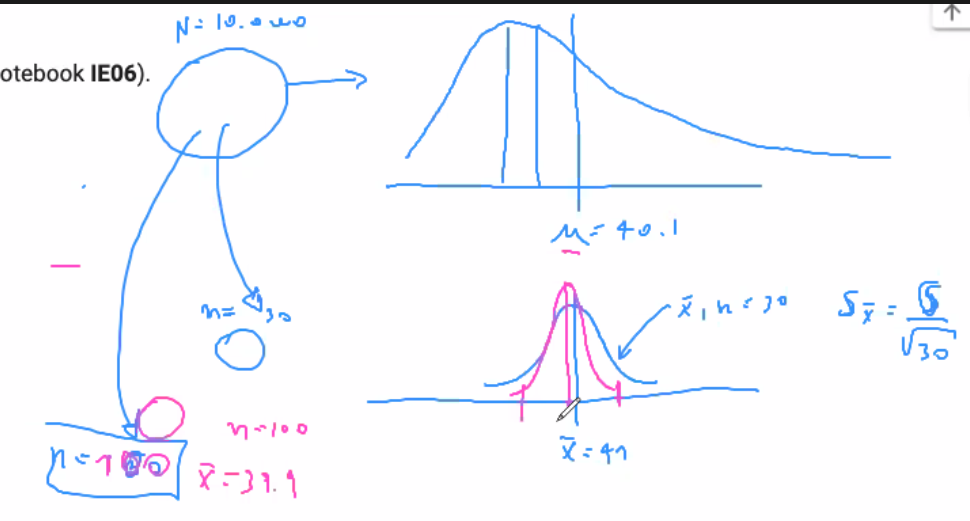

### <font color='blue'> **Casos de uso de la Distribución Muestral**</font>

Existen muchas decisiones que se toman con base en los resultados muestrales. Por ejemplo:

* Un gerente de producción puede tomar una muestra de un producto para determinar si cumple con ciertas especificaciones de calidad.
* Un funcionario del gobierno tomará una muestra de los residentes para decidir si cierto plan tributario o programa de bienestar social producirá los resultados deseados.
* Un académico tomará muestras de estudiantes para evaluar el impacto de una nueva plataforma de aprendizaje introducida en pandemia.



### <font color='green'>Actividad 1</font>
(Individual en aula principal)
* Desarrolle algunos ejemplos adicionales en los cuales tiene sentido el tomar decisiones en base a muestras. Piense en su día a día.

Tu respuesta aquí ...

1. Encuestas de para para tener información de una población

2. Selección de estudio de un biocultivo

3. Tomar grupos de personas para determinar la valoración de un nuevo producto de mercado



<font color='green'>Fin actividad 1</font>

Por lo general las muestras tienen un impacto muy directo en las decisiones que se toman, por tanto toda conclusión que se obtenga o todo conocimiento que se decodifique respecto a una muestra es muy importante.

Una aplicación muy común y de gran utilidad en una distribución muestral es la de determinar la probabilidad de que una media muestral clasifique dentro de un rango dado (probabilidad que la media muestral sea menor que, mayor que, o entre un rango determinado). Esto funciona debido a que la distribución muestral estará distribuida normalmente por las siguientes razones:
 * las muestras provienen de una población normal, o
 * el tamaño de las muestras es de $n \ge 30$, independiente de la distribución de la población, ya que el Teorema del Límite Central garantiza la normalidad en el proceso de muestreo.

### <font color='blue'> **Veamos un ejemplo**</font>

El diámetro de las tortas de Girasol se __distribuye normalmente__ con media 18 cm y desviación estandar de 6 cm. En una muestra de 10 tortas, ¿Cuál es la probabilidad de encontrar tortas de diámetro promedio inferior a 16 cm?

1. Calcularemos los estadísticos
2. Visualizaremos la Función de Densidad de Probabilidad de la población y de las muestras.
3. Calcularemos la propabilidad solicitada.


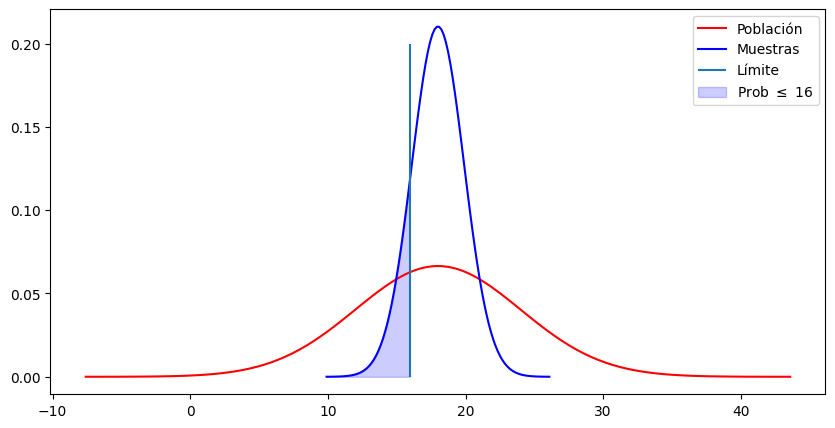

In [ ]:
# X = Diámetro tortas, sigue una Distribución Normal =>    𝑋~𝑁(18;6)
# Definir parámetros 𝑋~N(mu, sigma)
Mu = 18
Sigma = 6  #sigma población


# Estadisticos 𝑋barra~𝑁(18; 6/√10), debido a que Población es Normal y
# como se conoce Sigma población, esto a pesar de ser una muestra <30.
# 𝑋barra~N(Mu, sigma/raiz(n))
n = 10
xbarra_barra = Mu
Sigma_xbarra = Sigma / np.sqrt(n) # TLC  Sigma muestral = Sigma pob / raiz (n)

# Visualizar
# Graficando la distribución normal de población y medias

# Proyectar distribución población
poblacion = stats.norm(Mu, Sigma)
x = np.linspace(poblacion.ppf(0.00001), poblacion.ppf(0.99999), 100)
pdf = poblacion.pdf(x) #funcion densidad probabilidad

# proyectar distribución medias n=10
medias = stats.norm(xbarra_barra, Sigma_xbarra)
x_m = np.linspace(medias.ppf(0.00001), medias.ppf(0.99999), 100)
pdf_m = medias.pdf(x_m) # funcion densidad probabilidad

limite = 16 # límite

plt.figure(figsize=(10, 5)) # tamaño gráfico
plt.plot(x, pdf,"r") # población fit
plt.plot(x_m, pdf_m,"b", ) # medias fit
plt.vlines(ymin=0, ymax=0.2, x=limite)# Límite
plt.fill_between(x_m, pdf_m,
                 where = (x_m < limite),
                 color='b', alpha=0.2, label='Prob <= 16')
plt.legend(['Población','Muestras', 'Límite', 'Prob $\leq$ 16'])
plt.show()


In [ ]:
# En una muestra de 10 tortas, ¿Cuál es la probabilidad de encontrar tortas
# de diámetro promedio inferior a 16 cm?
# 𝑃(𝑥barra ≤ 16)

# calcular 𝑃(𝑥barra ≤ 16)

prob_16 = medias.cdf(limite)
print(f'Prob <= 16: {prob_16: 6.4f}')

Prob <= 16:  0.1459


### <font color='green'>Actividad 2</font>

Una población de fuentes de alimentación para micro-computadores tiene un voltaje de salida (output) que sigue una distribución normal de media 5 voltios y desviación estándar 0.1 voltios. Se extrae una muestra aleatoria simple de 8 alimentadores.

1. Obtener la distribución de $\bar{x}$
2. Hallar la probabilidad de que el valor de $\bar{x}$ se desvíe en más de 0.05 voltios de la media poblacional $\mu$ conocida.

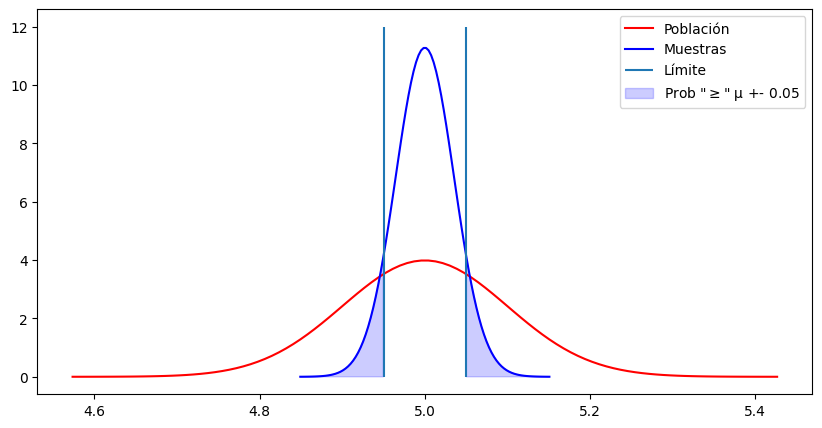

In [ ]:
# X = alimentación para micro-computadores, sigue una Distribución Normal =>    𝑋~𝑁(5;0.1)
# Definir parámetros 𝑋~N(mu, sigma)
Mu = 5
Sigma = 0.1  #sigma población


# Estadisticos 𝑋barra~𝑁(5; 0.1/√8), debido a que Población es Normal y
# como se conoce Sigma población, esto a pesar de ser una muestra <30.
# 𝑋barra~N(Mu, sigma/raiz(n))
n = 8
xbarra_barra = Mu
Sigma_xbarra = Sigma / np.sqrt(n) # TLC  Sigma muestral = Sigma pob / raiz (n)

# Visualizar
# Graficando la distribución normal de población y medias

# Proyectar distribución población
poblacion = stats.norm(Mu, Sigma)
x = np.linspace(poblacion.ppf(0.00001), poblacion.ppf(0.99999), 100)
pdf = poblacion.pdf(x) #funcion densidad probabilidad

# proyectar distribución medias n=8
medias = stats.norm(xbarra_barra, Sigma_xbarra)
x_m = np.linspace(medias.ppf(0.00001), medias.ppf(0.99999), 100)
pdf_m = medias.pdf(x_m) # funcion densidad probabilidad

limite_superior = 5.05 # límite
limite_inferior = 4.95 # límite
mask = (x_m < limite_inferior) | (x_m > limite_superior)

plt.figure(figsize=(10, 5)) # tamaño gráfico
plt.plot(x, pdf,"r") # población fit
plt.plot(x_m, pdf_m,"b", ) # medias fit
plt.vlines(ymin=0, ymax=12, x=(limite_superior, limite_inferior))# Límite
plt.fill_between(x_m, pdf_m,
                 where = (mask),
                 color='b', alpha=0.2, label='Prob >= Mu +- 0.05')
plt.legend(['Población','Muestras', 'Límite', 'Prob "$\geq$" μ +- 0.05']) #"$\leq$": Less than or equal to / "$\geq$": Greater than or equal to / "$<$": Less than / "$>$": Greater than
plt.show()


In [ ]:
prob_plus005 = stats.norm(Mu, Sigma_xbarra).cdf(limite_inferior)
print(f'Prob <= μ + 0.05: {prob_plus005: 6.4f}')

prob_minus005 = 1 - stats.norm(Mu, Sigma_xbarra).cdf(limite_superior)
print(f'Prob <= μ - 0.05: {prob_minus005: 6.4f}')

prob_mask = stats.norm(Mu, Sigma_xbarra).cdf(limite_inferior) + (1 - stats.norm(Mu, Sigma_xbarra).cdf(limite_superior))
print(f'Prob x <= μ - 0.05 & μ + 0.05 <= x: {prob_mask: 6.4f}')

Prob <= μ + 0.05:  0.0786
Prob <= μ - 0.05:  0.0786
Prob x <= μ - 0.05 & μ + 0.05 <= x:  0.1573


<font color='green'>Fin actividad 2</font>

### <font color='green'>Actividad 3</font>

Las latas de cerveza vendidas por KOTMAN tienen un promedio de 16.1 onzas, con una desviación estándar de 1.2 onzas (se asume población normal).
Si se toma una muestra de de $n=200$, cuál es la probabilidad de que la media sea:
1. ¿menos que 16.27 onzas?
2. ¿por lo menos 15.93?
3. Si la especificación de calidad (VoC = Voz del Cliente) indica que las cervezas deben contener entre 13.1 y 18.5 onzas, ¿qué porcentaje no cumple la voz del cliente?

In [ ]:
# X = onzas latas de cerveza vendidas, sigue una Distribución Normal =>    𝑋~𝑁(16.1;0.1)
# Definir parámetros 𝑋~N(mu, sigma)
Mu = 16.1
Sigma = 1.2  #sigma población


# Estadisticos 𝑋barra~𝑁(16.1; 1.2/√200), debido a que Población es Normal y como se conoce Sigma población
# 𝑋barra~N(Mu, sigma/raiz(n))
n = 200
xbarra_barra = Mu
Sigma_xbarra = Sigma / np.sqrt(n) # TLC  Sigma muestral = Sigma pob / raiz (n)


#1
limite_1 = 16.27
prob_1 = stats.norm(Mu, Sigma_xbarra).cdf(limite_1)
print(f'Prob x < 16.27 onzas: {prob_1: 6.4f}')

#2
limite_2 = 15.93
prob_2 = 1 - stats.norm(Mu, Sigma_xbarra).cdf(limite_2)
print(f'Prob x >= 15.93 onzas: {prob_2: 6.4f}')

#3
limite_3 = 13.1
limite_4 = 18.5
prob_intervalo = 1 - (stats.norm(Mu, Sigma_xbarra).cdf(limite_4) - stats.norm(Mu, Sigma_xbarra).cdf(limite_3))
print(f'Prob 13.1 <= x <= 18.5: {prob_intervalo: 6.4f}')


Prob x < 16.27 onzas:  0.9774
Prob x >= 15.93 onzas:  0.9774
Prob 13.1 <= x <= 18.5:  0.0000


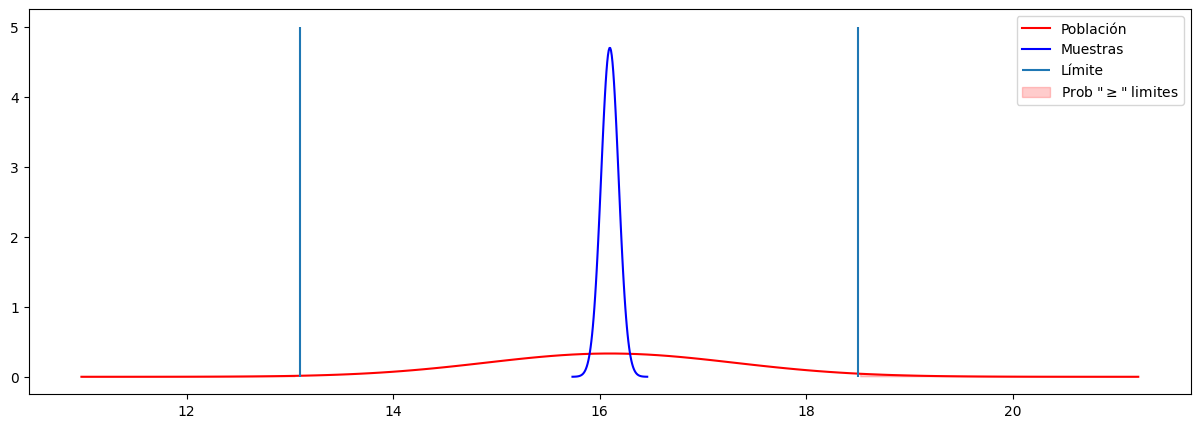

Prob x <= μ - 0.05 & μ + 0.05 <= x:  0.0290


In [ ]:
#3



poblacion = stats.norm(Mu, Sigma)
x = np.linspace(poblacion.ppf(0.00001), poblacion.ppf(0.99999), 100)
pdf = poblacion.pdf(x) #funcion densidad probabilidad

# proyectar distribución medias n=8
medias = stats.norm(xbarra_barra, Sigma_xbarra)
x_m = np.linspace(medias.ppf(0.00001), medias.ppf(0.99999), 100)
pdf_m = medias.pdf(x_m) # funcion densidad probabilidad

limite_3 = 13.1
limite_4 = 18.5
mask = (x < limite_3) | (x > limite_4)

plt.figure(figsize=(15, 5)) # tamaño gráfico
plt.plot(x, pdf,"r") # población fit
plt.plot(x_m, pdf_m,"b", ) # medias fit
plt.vlines(ymin=0, ymax=5, x=(limite_4, limite_3))# Límite
plt.fill_between(x, pdf,
                 where = (mask),
                 color='r', alpha=0.2, label='Prob >= Mu +- limites')
plt.legend(['Población','Muestras', 'Límite', 'Prob "$\geq$" limites']) #"$\leq$": Less than or equal to / "$\geq$": Greater than or equal to / "$<$": Less than / "$>$": Greater than
plt.show()

prob_mask = stats.norm(Mu, Sigma).cdf(limite_3) + (1 - stats.norm(Mu, Sigma).cdf(limite_4))
print(f'Prob x <= μ - 0.05 & μ + 0.05 <= x: {prob_mask: 6.4f}')

<font color='green'>Fin actividad 3</font>



## <font color='blue'>**Distribución de Proporciones Muestrales**</font>

Existen muchos desafíos de negocios que tratan sobre la proporción de la población, en particular en aquellos en los cuales la variable a estudiar es un atributo cualitativo; denotaremos esta proporción como $\pi$ o $p$. Veamos unos ejemplos:
* Una empresa de marketing puede querer averiguar si un cliente __compra (1)__ o  __no compra (0)__ el producto.
* Un banco con frecuencia debe determinar si un cliente __continuará (1)__ o __no continuará (0)__ siendo cliente al finalizar el mes.
* Un servicio digital (música) necesita saber si sus clientes en modo freemium __se convertirán en subscriptores premium (1)__ o __seguirán siendo usarios en modo gratuito (0)__.
* Muchas compañías para asignar presupuesto a sus estrategias, deben determinar la probabilidad de que un proyecto __generará (1)__ o __no generará (0)__ un rendimiento positivo.

Cuando en una población procedemos a estudiar una característica con solo __dos posibles valores (éxito: 1 o fracaso: 0)__, entonces la __población sigue una distribución binomial__.

Al tomar muestras de la población, cada muestra tendrá un porcentaje de individuos que tiene esa característica, donde $p$ es la __proporción de éxito__ de esta variable aleatoria de la población. La proporción de fracaso es $q$, la cual se calcula como $q = 1 – p$.

La distribución asociada a la variable aleatoria que une cada muestra con su proporción se llama __distribución muestral de proporciones__.

Como, para poblaciones grandes, la binomial se aproxima a la normal, la distribución muestral de proporciones también sigue una distribución normal con la siguiente forma:
<br><br>
$$\hat{p} \sim N\left(p, \; \sqrt{\frac{p\:(1-p)}{n}}\right)$$
<br>

Esto siempre que $n$ sea suficientemente grande ($n \ge 30$), y $\;n \times p \ge 5$, $\;n \times q \ge 5$.

En estos casos se utiliza la __media de proporción muestral__ para estimar el parámetro desconocido $\pi$ o $p$.
<br><br>
$$E(\hat{p}) = \mu_{\hat{p}} = \frac{\mu_x}{n} = \frac{np}{n} = p$$
<br><br>
$$\sqrt{V_{\hat{p}}} = \frac{V(X)}{n} = \frac{\sqrt{np\:(1-p)}}{n} = \sqrt{\frac{np\:(1-p)}{n^2}} =  \sqrt{\frac{p\:(1-p)}{n}}$$
<br>
si:
$$n \ge 30$$ <br>
$$np \ge 5$$ y <br>
$$n(1-p) \ge 5$$

Entonces:

$$\hat{p} \sim N\left(p, \;\sqrt{\frac{p\:(1-p)}{n}}\right)$$

Como vemos el proceso de las __proporciones muestrales__ es muy similar al que vimos en las __medias muestrales__.

<img src='https://drive.google.com/uc?export=view&id=1vOhMSjMOoxIi-bePLl0eGRsdrt46bZ9f' width="800" align="left" style="margin-right: 20px">
<br>



A continuación, veamos un ejemplo en el cual tenemos una población de 10.000 clientes, de los cuales el 60% de ellos dicen estar satisfechos (1) con el servicio recibido, y el 40% restante, no lo está (0). Crearemos una población ficticia con estos parámetros, extraeremos varias muestras a las cuales calcularemos la __proporción muestral__ para, posteriormente, graficar la distribución de dichas proporciones.

Proporción poblacional: 0.6119
Desviación estándar poblacional: 0.4873
Otra forma de sigma: 0.4873


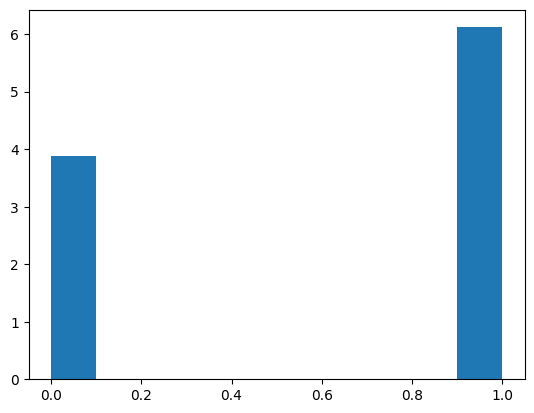

In [ ]:
# Creamos población de 10000 clientes "Satisfechos: 1 " o "No satisfechos: 0",
# donde el 60% está Satisfecho

N = 10000
n = 1
p = 0.6

pob = np.random.RandomState(seed=2).binomial(n, p, size=N)

# graficar histograma de la población
plt.hist(pob, density=True)
plt.show

# calcular parámetros
prop_pob = np.mean(pob) # Note que una proporción es una media de ceros y unos!
sigma_pob = np.std(pob)

print(f'Proporción poblacional: {prop_pob:6.4f}')
print(f'Desviación estándar poblacional: {sigma_pob:6.4f}')

# Otra forma
sigma_pob2 = np.sqrt(prop_pob * (1 - prop_pob))
print(f'Otra forma de sigma: {sigma_pob2:6.4f}')

Lo mismo pero con `scipy.stats`

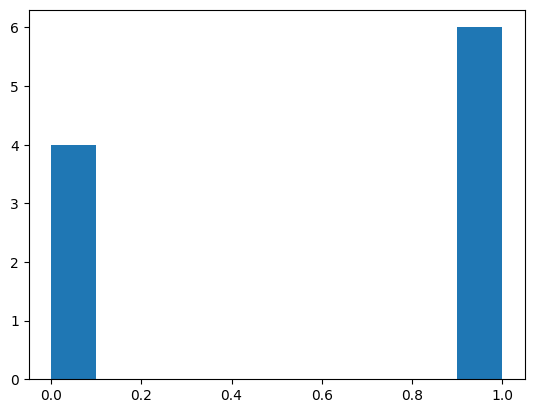

In [ ]:
# Graficando Binomial
n, p = 1, 0.6 # parámetros de forma
binomial = stats.binom(n, p) # Distribución
pob2 = binomial.rvs(size=N)
plt.hist(pob2, density=True)
plt.show()

In [ ]:
# Muestreo
# sacar m muestras de tamaño n, calcular la proporción muestral

n = 50
m = 100
muestras = []
for i in range(m):
    muestras_n = np.random.choice(pob, n, replace=True)
    # Ahora calculamos la proporción muestral (p muestra) de cada muestra
    muestras.append(muestras_n.mean())

for i, m in enumerate(muestras):
    print(f'Muestra {i} \tp muestra: {m:4.2f}')

Muestra 0 	p muestra: 0.48
Muestra 1 	p muestra: 0.54
Muestra 2 	p muestra: 0.64
Muestra 3 	p muestra: 0.60
Muestra 4 	p muestra: 0.62
Muestra 5 	p muestra: 0.66
Muestra 6 	p muestra: 0.68
Muestra 7 	p muestra: 0.70
Muestra 8 	p muestra: 0.62
Muestra 9 	p muestra: 0.66
Muestra 10 	p muestra: 0.68
Muestra 11 	p muestra: 0.66
Muestra 12 	p muestra: 0.64
Muestra 13 	p muestra: 0.60
Muestra 14 	p muestra: 0.64
Muestra 15 	p muestra: 0.68
Muestra 16 	p muestra: 0.60
Muestra 17 	p muestra: 0.52
Muestra 18 	p muestra: 0.68
Muestra 19 	p muestra: 0.52
Muestra 20 	p muestra: 0.56
Muestra 21 	p muestra: 0.54
Muestra 22 	p muestra: 0.66
Muestra 23 	p muestra: 0.60
Muestra 24 	p muestra: 0.68
Muestra 25 	p muestra: 0.52
Muestra 26 	p muestra: 0.62
Muestra 27 	p muestra: 0.64
Muestra 28 	p muestra: 0.56
Muestra 29 	p muestra: 0.46
Muestra 30 	p muestra: 0.60
Muestra 31 	p muestra: 0.64
Muestra 32 	p muestra: 0.68
Muestra 33 	p muestra: 0.48
Muestra 34 	p muestra: 0.52
Muestra 35 	p muestra: 0.68
Mu

Media de proporciones:  0.6052
sigma de proporciones:  0.0619


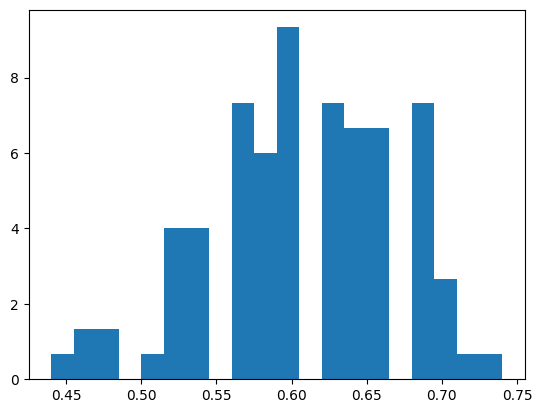

In [ ]:
# Crearemos la lista de p muestral (proporciones muestrales) para después
# graficar y ejecutar test de normalidad

p_barra = np.mean(muestras)
sigma_pbar = np.std(muestras)
print(f"Media de proporciones: {p_barra: 6.4f}")
print(f"sigma de proporciones: {sigma_pbar: 6.4f}")

plt.hist(muestras, bins=20, density=True)
plt.show()

### <font color='blue'>**Test de normalidad**</font>

Para comprobar si los datos siguen una distribución normal, utilizaremos un test de normalidad denominado __Anderson-Darling__, el cual evalúa la hipótesis:

$H_0$: los datos __siguen__ una distribución normal

$H_1$: los datos __NO siguen__ una distribución normal

Si el valor arrojado (Test estadístico de Anderson-Darling) es menor al valor crítico dado para un cierto nivel de significancia (e.g.: 5%), no se puede rechazar la hipótesis $H_0$, i.e., los datos tienen una distribución normal.

Generaremos una gráfica de probabilidad de datos de muestra contra los cuantiles de una distribución teórica específica (la distribución normal por defecto). Utilizaremos la función `probplot`, la cual calcula opcionalmente una línea de mejor ajuste para los datos y traza los resultados usando Matplotlib o una función de trazado dada.

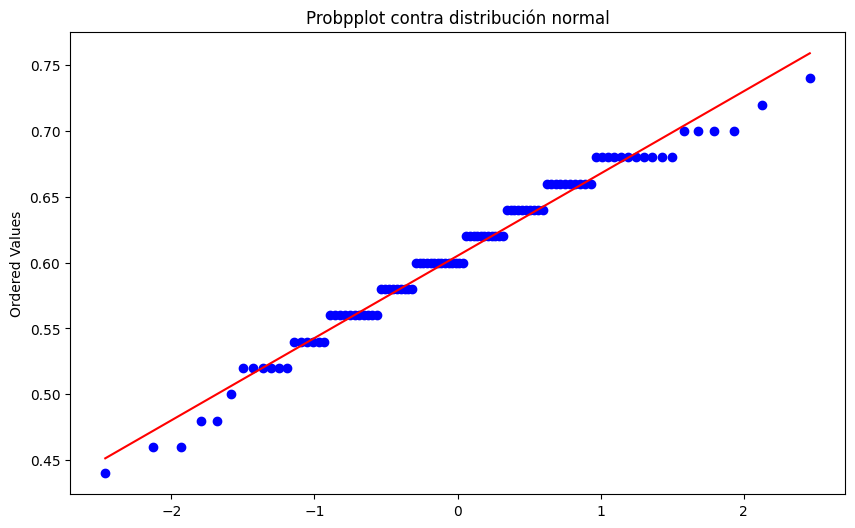

In [ ]:
# crear gráfico de probabilidad
fig, ax = plt.subplots(1,1, figsize=(10,6))
x = muestras
prob = stats.probplot(x, dist=stats.norm, plot=ax, fit=True)
ax.set_xlabel(None)
ax.set_title('Probpplot contra distribución normal')

#comprobar normalidad de los datos con Anderson-Darling
tsad = stats.anderson(muestras, dist='norm')

In [ ]:
prob

((array([-2.46203784, -2.12570747, -1.93122778, -1.79044653, -1.67819304,
         -1.58381122, -1.50174123, -1.42869743, -1.36256869, -1.30191411,
         -1.24570419, -1.19317644, -1.14374949, -1.09696931, -1.05247413,
         -1.00997067, -0.96921765, -0.93001393, -0.89218993, -0.85560121,
         -0.82012357, -0.78564937, -0.75208458, -0.71934648, -0.68736185,
         -0.65606548, -0.62539893, -0.59530962, -0.56574992, -0.53667655,
         -0.50804994, -0.47983378, -0.45199463, -0.42450149, -0.39732558,
         -0.37044003, -0.34381966, -0.31744076, -0.29128096, -0.26531902,
         -0.23953472, -0.21390872, -0.18842244, -0.16305799, -0.13779803,
         -0.1126257 , -0.08752455, -0.06247843, -0.03747145, -0.01248789,
          0.01248789,  0.03747145,  0.06247843,  0.08752455,  0.1126257 ,
          0.13779803,  0.16305799,  0.18842244,  0.21390872,  0.23953472,
          0.26531902,  0.29128096,  0.31744076,  0.34381966,  0.37044003,
          0.39732558,  0.42450149,  0.

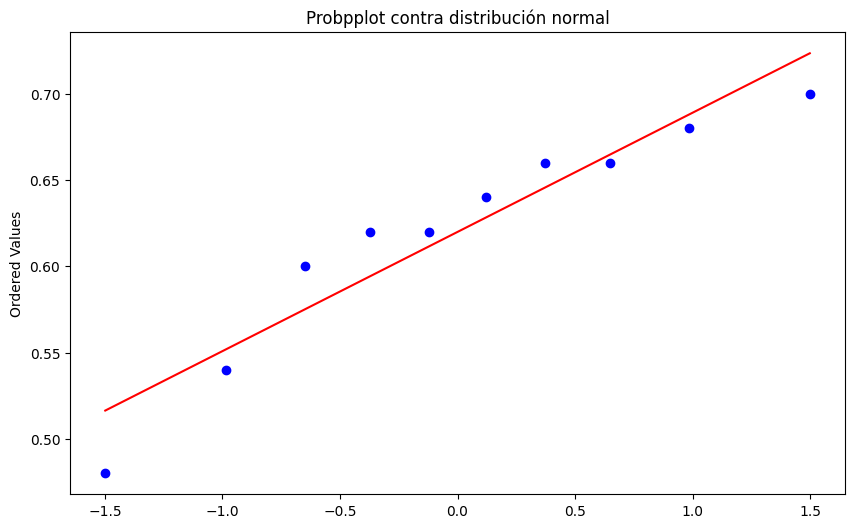

In [ ]:
# crear gráfico de probabilidad con una submuestra
fig, ax = plt.subplots(1,1, figsize=(10,6))
x = muestras[:10]
prob = stats.probplot(x, dist=stats.norm, plot=ax)
ax.set_xlabel(None)
ax.set_title('Probpplot contra distribución normal')
plt.show()

In [ ]:
print(f'Test estadístico de Anderson-Darling: {tsad[0]:6.4f}\n')
print(f'Valores críticos        : {tsad[1][0]}\t{tsad[1][1]}\t{tsad[1][2]}\t{tsad[1][3]}\t{tsad[1][4]}')
print(f'Niveles de significancia: {tsad[2][0]}\t{tsad[2][1]}\t{tsad[2][2]}\t{tsad[2][3]}\t{tsad[2][4]}')

Test estadístico de Anderson-Darling: 0.7394

Valores críticos        : 0.555	0.632	0.759	0.885	1.053
Niveles de significancia: 15.0	10.0	5.0	2.5	1.0


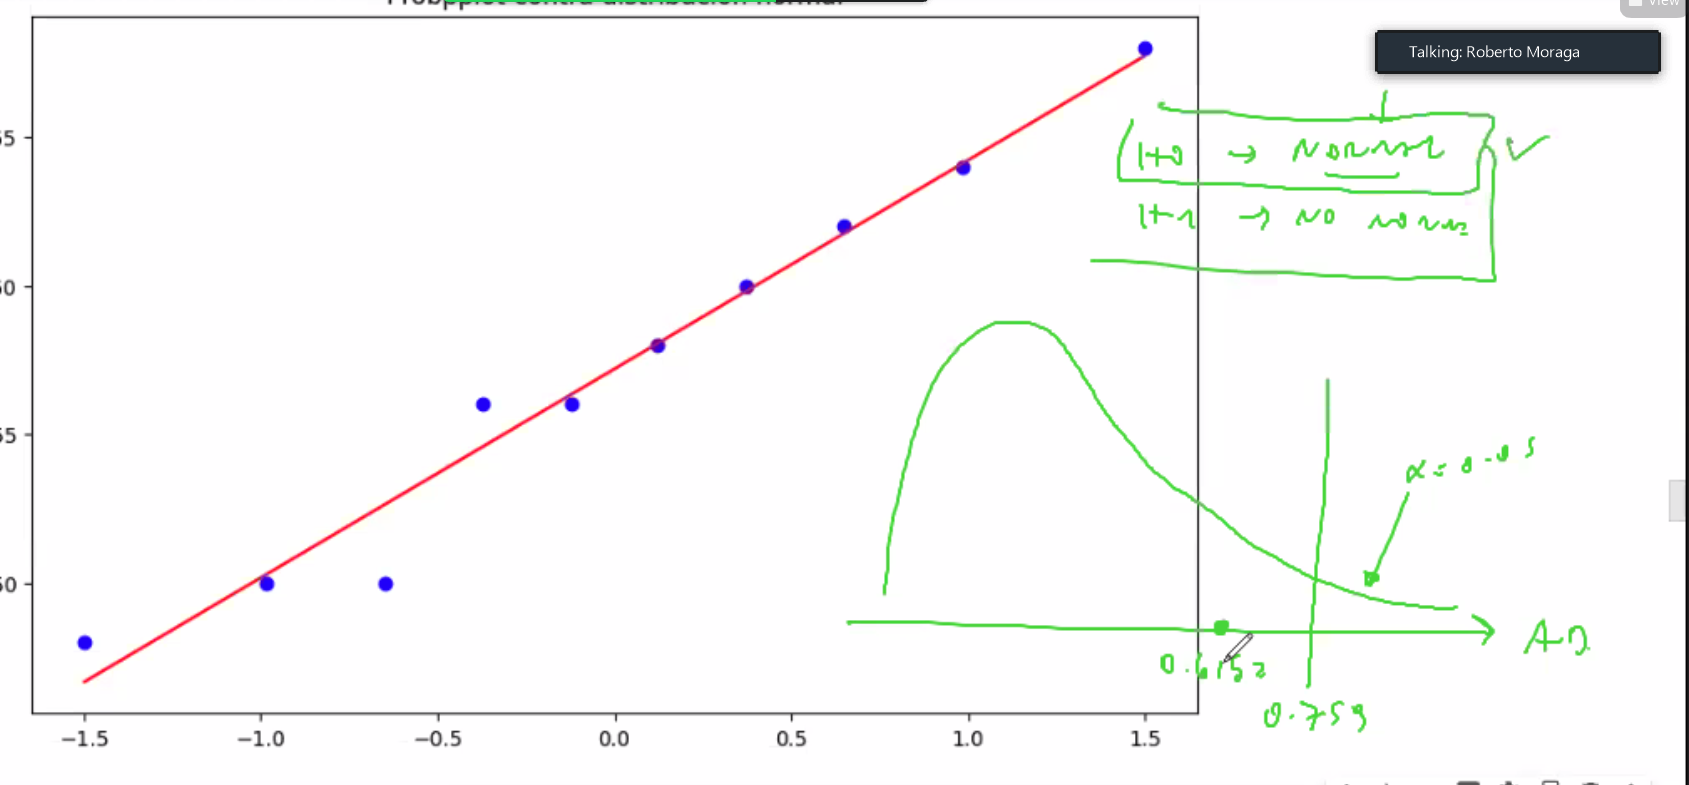

### <font color='green'>Actividad 4</font>

Se ha determinado que el 60% de los estudiantes de una universidad fuman cigarrillos. Se toma una muestra aleatoria de 800 estudiantes.
1. Calcule la probabilidad de que la proporción de la muestra de la gente que fuma cigarrillos sea menor que 0.55.
2. Visualice la distribución y el límite (0.55)

In [ ]:
# X = Asumiendo que sigue una Distribución Normal => Podemos calcular la distribución de proporción muestral  𝑋~𝑁(Mu;Sigma)
# Definir parámetros poblacionales 𝑋~N(mu, sigma)
p = 0.6 # prop de la población
n = 800
sigma = np.sqrt(p * (1 - p)) # desv std. población

limite = 0.55
xbarra_barra = p
Sigma_xbarra = sigma/np.sqrt(n)

#1
prob_055 = stats.norm(xbarra_barra, Sigma_xbarra).cdf(limite)
print(f'Prob <= 0.55: {prob_055: 6.4f}')


Prob <= 0.55:  0.0019


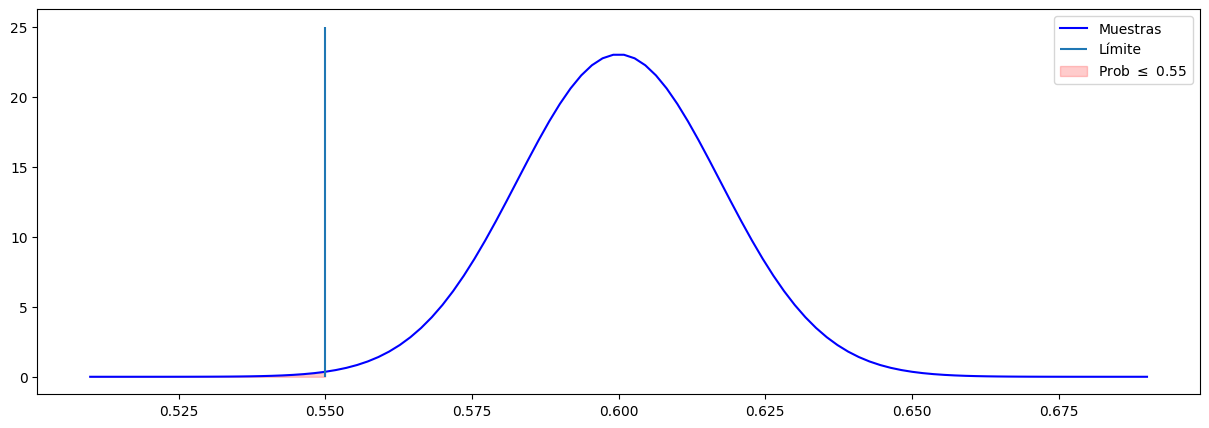

In [ ]:
#2
# Visualizar

# proyectar distribución medias n=800
medias = stats.norm(xbarra_barra, Sigma_xbarra)
x_m = np.linspace(medias.ppf(0.0000001), medias.ppf(0.9999999), 100)
pdf_m = medias.pdf(x_m) # funcion densidad probabilidad

limite = 0.55

plt.figure(figsize=(15, 5)) # tamaño gráfico
plt.plot(x_m, pdf_m,"b") # medias fit
plt.vlines(ymin=0, ymax=25, x=limite)# Límite
plt.fill_between(x_m, pdf_m,
                 where = (x_m < limite),
                 color='r', alpha=0.2, label='Prob <= 0.55')
plt.legend(['Muestras', 'Límite', 'Prob $\leq$ 0.55']) #"$\leq$": Less than or equal to / "$\geq$": Greater than or equal to / "$<$": Less than / "$>$": Greater than
plt.show()

<font color='green'>Fin actividad 4</font>

### <font color='green'>Actividad 5</font>

Un medicamento para tratar el malestar estomacal, tiene la advertencia de que algunos usuarios pueden presentar una reacción adversa a él, más aún, se piensa que alrededor del 3% de los usuarios tienen tal reacción.

1. Si una muestra aleatoria de 150 personas con malestar estomacal usa el medicamento, encuentre la probabilidad de que la proporción de la muestra de los usuarios que realmente presentan una reacción adversa, exceda el 4%.
2. Visualice la distribución y el límite (0.04)

In [ ]:
# Datos
p = 0.03 # prop de la población
sigma = np.sqrt(p * (1 - p)) # desv std. población
n = 150
li = 0.04 # límite

prob1= stats.norm(p, sigma/np.sqrt(n)).sf(li) # se calcula el complemento con .sf
print(f'Probabilidad es: {prob1:6.4f}')


Probabilidad es: 0.2364


In [ ]:
# Si tuviésemos que calcularlo yendo a las tablas de valores Z

Z = (li - p)/(sigma/np.sqrt(n))
print(f'Z: {Z:6.4f}')

Z: 0.7180


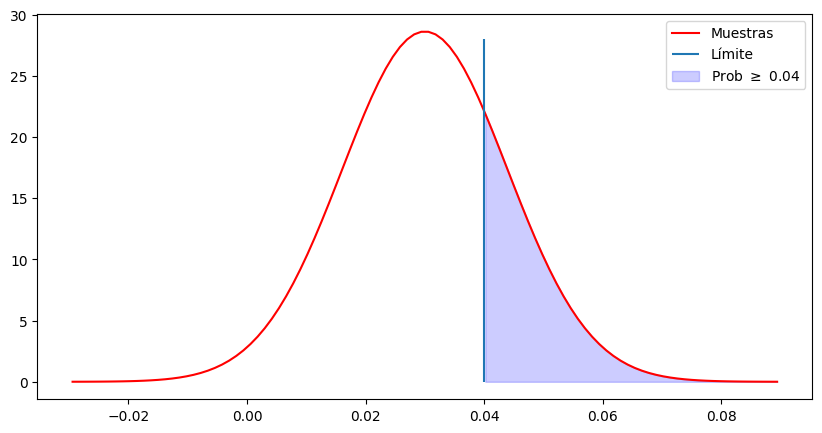

In [ ]:
# Visualizar
# proyectar distribución proporciones muestrales
medias = stats.norm(p, sigma/np.sqrt(n))
x_m = np.linspace(medias.ppf(0.00001), medias.ppf(0.99999), 100)
pdf_m = medias.pdf(x_m) # función densidad probabilidad

li = 0.04

plt.figure(figsize=(10, 5)) # tamaño gráfico
plt.plot(x_m, pdf_m,"r", ) # proporciones fit
plt.vlines(ymin=0, ymax=28, x=li)# Límite
plt.fill_between(x_m, pdf_m,
                 where = (x_m > li),
                 color='b', alpha=0.2, label='Prob >= 0.04')
plt.legend(['Muestras', 'Límite', 'Prob $\geq$ 0.04'])
plt.show()

<font color='green'>Fin actividad 5</font>

## <font color='blue'>**Estimación con Intervalos de Confianza**</font>

### <font color='blue'>**¿Qué es un intervalo de confianza?**</font>

Un __intervalo de confianza__ es un rango de valores, derivado de los estadísticos de la muestra, que __posiblemente incluya el valor de un parámetro de población desconocido__. Debido a su naturaleza aleatoria, es poco probable que dos muestras de una población en particular produzcan intervalos de confianza idénticos. Sin embargo, si usted repitiera muchas veces su muestra, un determinado porcentaje de los intervalos de confianza resultantes incluiría el parámetro de población desconocido.


<img src='https://drive.google.com/uc?export=view&id=1IQlcdIKFwGhGcCccdSv3jLLmoLYSq2O-' width="300" style="margin-right: 20px">
<br>
En este caso, la línea negra horizontal representa el valor fijo de la media desconocida de la población, $\mu$. Los intervalos de confianza azules verticales que se sobreponen a la línea horizontal contienen el valor de la media de la población. El intervalo de confianza rojo que está completamente por debajo de la línea horizontal no lo contiene. Un intervalo de confianza de 95% indica que 19 de 20 muestras (95%) de la misma población producirán intervalos de confianza que contendrán el parámetro de población.

Si los valores de los parámetros son desconocidos, podemos estimarlos en base a muestras y esperamos que sean una buena aproximación al valor exacto.


<img src='https://drive.google.com/uc?export=view&id=1b30E6iYwsM9cHRgoDua5ABt2Ds1k-D1d' width="500" align="left" style="margin-right: 20px">
<br>


Para que las estimaciones sean confiables se debe cumplir:

*   Muestreo aleatorio probabilístico
*   La variable X debe distribuirse Normal, en caso contrario, el tamaño de la muestra debe ser lo suficientemente grande.
*   Desviación estándar conocida (o estimada a partir de una muestra con $n \gt 30$)


### <font color='blue'>**Estimación por Intervalos**</font>

<img src='https://drive.google.com/uc?export=view&id=1SezkwcwU5GEjlinK8Hw-JQiYy1G-EYze' width="500" style="margin-right: 20px">
<br>

Recordemos que la __estimación puntual__ entrega un “número”; el valor de una característica de la población (e.g.: la media, proporción, etc.). En muchos casos, esta estimación puntual no es suficiente en el sentido de que no indica el error que se comete en dicho cálculo.

Se aconseja junto a la estimación puntual del parámetro, entregar un __intervalo numérico__ que mida el __margen de error__ que, de acuerdo a las observaciones muestrales, pueda tener dicha estimación.

Ejemplo de intervalo para la media poblacional:

$$ \bar{x} - EM \lt \mu \lt \bar{x} + EM$$

Donde $\bar{x}$ es el estimador puntual de la media poblacional $\mu$, y $EM$ es el __margen del error__ de dicha estimación.


### <font color='blue'>**Intervalo de Confianza para la Media Poblacional**</font>

El intervalo de confianza permite estimar con una cierta probabilidad entre qué rango de valores se encuentra el parámetro.

$$P(LI \lt \mu \lt LS) = 1 - \alpha$$

*  __Nivel de confianza__:  es la probabilidad de que el parámetro (poblacional) esté dentro del intervalo de confianza. Se representa por $(1 - \alpha)$, y sus valores habituales son 95% y 99%.

*  __Nivel de significación o de riesgo__: se denomina como $\alpha$, y corresponde a la probabilidad de que el parámetro poblacional no pertenezca al intervalo de confianza.

*  __Margen de error__: es la diferencia entre el extremo superior y el extremo inferior del intervalo de confianza:  $LS - LI$.

*  __Error muestral (EM)__: es la semi amplitud del intervalo de confianza (la mitad del margen del error): $(LS - LI)/2$

Chicos aquí un ejemplo de como calcular IC para varianzas: https://github.com/robertomoragad/Estadistica/blob/master/Intervalo_de_Confianza_(IC)_para_varianza.ipynb

### <font color='blue'>**Muestras grandes**</font>

**Pasos**

Para construir un Intervalo de Confianza, se puede comprobar que la distribución Normal se cumple:
<br><br>
$$P(-Z_{\frac{\alpha}{2}} <Z<Z_{\frac{\alpha}{2}} )=1-\alpha$$
<br><br>
Sea $\bar{X}$  una variable aleatoria (v.a.) que se distribuye Normal $\Rightarrow \bar{X} \sim N(\mu, \frac{\sigma}{\sqrt{n}})$ con $\sigma$ conocida.

__Pasos:__
1.  Fijar el nivel de confianza, $(1-\alpha);\quad 0 \lt \alpha \lt 1$
2.  Selección el estadístico pivote ($Z$) para la estimar la media muestral:

$$Z = \frac{\bar{x} - \mu}{\frac{\sigma}{\sqrt{n}}} \sim N(0,1)$$
<br>
$$P(-Z_{\frac{\alpha}{2}} \leq Z\leq Z_{\frac{\alpha}{2}} )=1-\alpha$$
<br>
$$-Z_{\frac{\alpha}{2}} \leq Z \leq Z_{\frac{\alpha}{2}}$$
<br>
$$-Z_{\frac{\alpha}{2}} \leq \frac{\bar{x} - \mu}{\frac{\sigma}{\sqrt{n}}}\leq Z_{\frac{\alpha}{2}}$$
<br>
$$-\bar{x} -Z_{  \frac{\alpha}{2}} \frac{\sigma}{\sqrt{n}} \leq -\mu \leq -\bar{x} + Z_{  \frac{\alpha}{2}} \frac{\sigma}{\sqrt{n}}$$
<br>
Multiplicando por -1.
<br>
$$\bar{x} + Z_{  \frac{\alpha}{2}} \frac{\sigma}{\sqrt{n}} \gt \mu \gt \bar{x}  - Z_{  \frac{\alpha}{2}} \frac{\sigma}{\sqrt{n}}$$

Lo que es igual a:
<br>
$$\bar{x} - Z_{  \frac{\alpha}{2}} \frac{\sigma}{\sqrt{n}} \le \mu \le \bar{x}  + Z_{  \frac{\alpha}{2}} \frac{\sigma}{\sqrt{n}}$$


Luego:


<img src='https://drive.google.com/uc?export=view&id=1W3LNdPHdYctV23g4kZ12utXBhknYfL9W' width="500"  style="margin-right: 20px">
<br>


 $$ \bar{x} - Z_{1-{\frac{\alpha}{2}}} \frac{\sigma}{\sqrt{n}} \le \mu \le \bar{x} + Z_{1-{\frac{\alpha}{2}}} \frac{\sigma}{\sqrt{n}} $$

</font>

3.  Plantear el Intervalo de Confianza para $\mu$ con nivel de confianza $(1−\alpha)$:

$$
IC_{1-\alpha}(\mu) = \left(\bar{x} - Z_{1-\alpha/2}\frac{\sigma}{\sqrt{n}};\quad\bar{x} + Z_{1-\alpha/2}\frac{\sigma}{\sqrt{n}}\right)
$$

donde:
$$
EM = Z_{1-\alpha/2}\frac{\sigma}{\sqrt{n}}
$$
y

$$LI = \bar{x} - EM$$
$$LS = \bar{x} + EM$$

El error de estimación esta acotado:<br><br>
$$
|{\bar{x}} - \mu| \le z_{1-\alpha/2} \frac{\sigma}{\sqrt{n}}
$$
<br>
Si queremos calcular el tamaño muestral necesario para que el error $e$  sea menor o igual a una cantidad  dada (e.g.: 0.05), hacemos:

$$
z_{1-\alpha/2} \frac{\sigma}{\sqrt{n}} \le e \Longleftrightarrow n \ge \frac{z_{1-\alpha/2}^2\sigma^2}{e^2}
$$

**Nota:**
Cuando se cuenta con una muestra grande $(n \ge 30)$, pero la __desviación estándar de la población es desconocida__,  se debe utilizar la desviación estándar de la muestra como un estimador de la desviación estándar poblacional.

$$
\left(\bar{x} - Z_{1-\alpha/2}\frac{S}{\sqrt{n}};\quad\bar{x} + Z_{1-\alpha/2}\frac{S}{\sqrt{n}}\right)
$$
donde
$$
S = \hat{S} = \sqrt{\frac{\sum{(x_i - \bar{x})^2}}{n-1}}
$$


### <font color='blue'>**Ejemplo de IC para muestras grandes**</font>

Se extrajo una muestra aleatoria de 172 clientes de la nueva APP de compras "cornerTop", y se les pidió que recordaran su última experiencia de compra para evaluar el servicio recibido en una escala de 1 (muy insatisfecho) a 5 (muy satisfecho). La satisfacción de los clientes recibió una calificación media de 4.38 con una desviación estándar muestral de 0.70.
1. Calcularemos el Intervalo de Confianza del 95% y 99% para la media poblacional.
2. Visualizaremos la distribución y el límite.

In [ ]:
# como n >= 30 aplicaremos Z (Distribucion normal estandarizada)

# Caso NC = 0.95
# primero registrar los datos

n = 172
xbar = 4.38
S = 0.7

# IC con NC 95%
NC = 0.95
alpha = 1 - NC
alpha_medio = alpha / 2

# Calcular Z con la función de distribución normal acumulada inversa (ppf)
Z = stats.norm.ppf(1 - alpha_medio)
print(f"Z: {Z: 6.4f}")

LI = xbar - Z * (S / np.sqrt(n))
LS = xbar + Z * (S / np.sqrt(n))

print(f'Intervalo de Confianza (IC) al {NC} para media poblacional: {LI:4.2f}, {LS:4.2f}')


Z:  1.9600
Intervalo de Confianza (IC) al 0.95 para media poblacional: 4.28, 4.48


In [ ]:
# Forma simple con Scipy
IC95 = stats.norm.interval(NC, loc = xbar, scale = S /np.sqrt(n))
print(f'IC al {NC} para media poblacional:  {IC95[0]:4.2f}, {IC95[1]:4.2f}')

IC al 0.95 para media poblacional:  4.28, 4.48


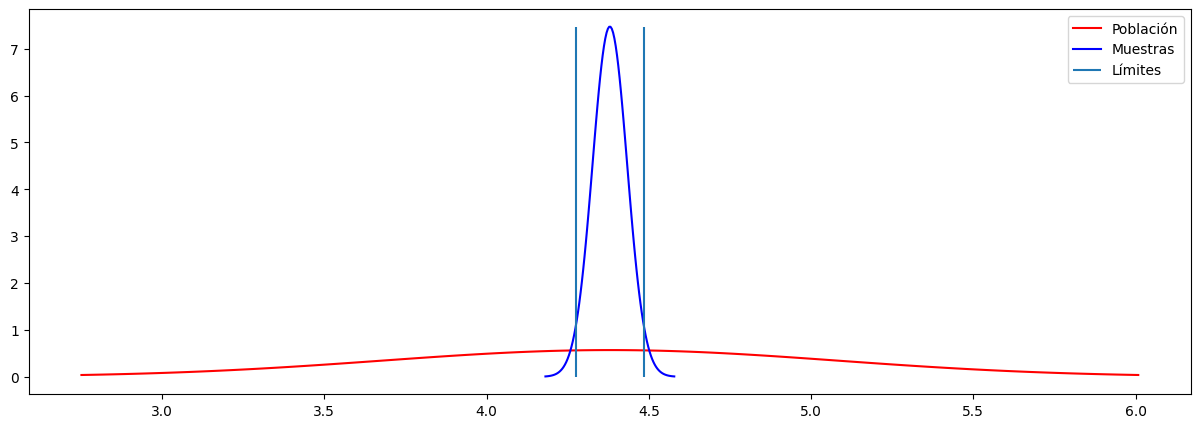

La probabilidad es: 0.9750


In [ ]:
# Graficando la distribución normal de población y medias

n = 172
xbar = 4.38
S = 0.7
S_xbar = S / np.sqrt(n)

# proyectar distribución población
poblacion = stats.norm(xbar, S)
x = np.linspace(poblacion.ppf(0.01), poblacion.ppf(0.99), 100)
pdf = poblacion.pdf(x) # función densidad probabilidad

# proyectar distribución medias n=172
medias = stats.norm(xbar, S_xbar)
x_m = np.linspace(medias.ppf(0.0001), medias.ppf(0.9999), 100)
pdf_m = medias.pdf(x_m) # función densidad probabilidad

plt.figure(figsize=(15, 5)) # tamaño gráfico
plt.plot(x, pdf,"r") # poblacion
plt.plot(x_m, pdf_m,"b", ) # medias
plt.vlines(ymin=0, ymax=max(pdf_m), x=LI)# LI IC
plt.vlines(ymin=0, ymax=max(pdf_m), x=LS)# LS IC
plt.legend(['Población','Muestras', 'Límites'])
plt.show()

# Solo para comprobar:
# calcular probabilidad de tomar una muestra y que ésta tenga una media menor al LS del IC
prob_acum_LS = stats.norm(xbar, S_xbar).cdf(LS)
print(f'La probabilidad es: {prob_acum_LS:6.4f}')

In [ ]:
# aplicar aquí para caso al 99%
# IC con NC 95%
NC99 = 0.99
alpha = 1 - NC99
alpha_medio = alpha / 2
# Calcular Z con la función de distribución normal acumulada inversa (ppf)
Z = stats.norm.ppf(1 - alpha_medio)
print(f"Z: {Z: 6.4f}")

LI = xbar - Z * (S / np.sqrt(n))
LS = xbar + Z * (S / np.sqrt(n))

print(f'Intervalo de Confianza (IC) al {NC99} para media poblacional: {LI:4.2f}, {LS:4.2f}')

Z:  2.5758
Intervalo de Confianza (IC) al 0.99 para media poblacional: 4.24, 4.52


### <font color ='green'>Actividad 6</font>

La empresa de transporte DUDU planea importar una flota de nuevos taxis para sus conductores. La decisión depende de si el rendimiento del auto en consideración tiene por lo menos 27.5 MPG (millas por galón). Los 36 autos que prueba la empresa reportaron una media de 25.6 MPG, con una desviación estándar muestral de 3.5 MPG.

1. A un nivel de confianza del 99% ¿qué aconsejaría a la empresa que hiciera?

Nota:<br>
27.5 MPG = 11.69 Km/L<br>
25.6 MPG = 10.88 Km/L<br>
3.5 MPG = 1.49 Km/L

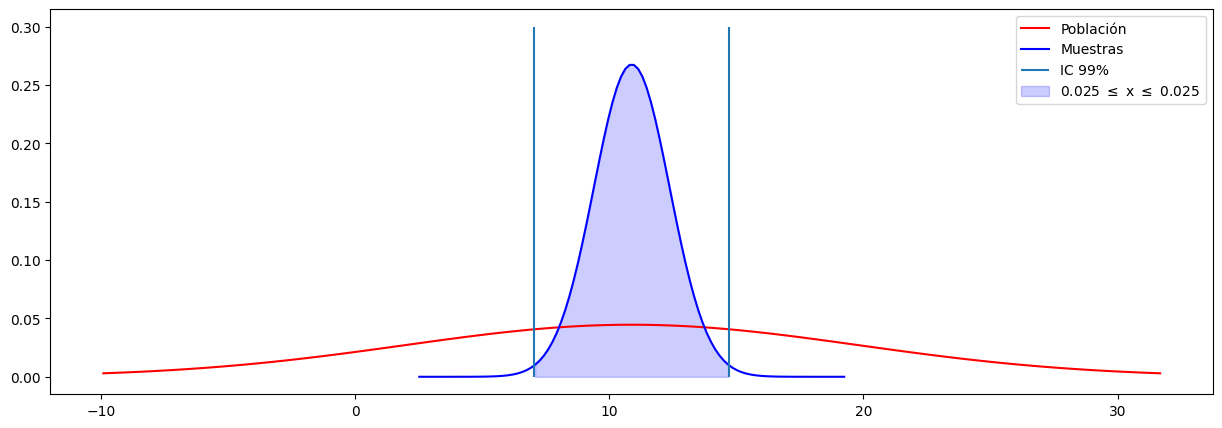

La probabilidad es: 0.9950
IC al 0.99 para media poblacional:  7.04, 14.72


In [ ]:
# Caso NC = 0.99
# Por lo menos un rendimiento de 11.69 Km/L
# primero registrar los datos
n= 36
xbar = 10.88 #Km/L
S_xbar = 1.49 #Km/L
S = S_xbar * np.sqrt(n)

# IC con NC 99%
NC = 0.99
alpha = 1 - NC
alpha_medio = alpha / 2

Z = stats.norm.ppf(1 - alpha_medio) # Calcular Z con la función de distribución normal acumulada inversa (ppf)

LI = xbar - Z * (S_xbar)
LS = xbar + Z * (S_xbar)

#Graficando la distribucion normal de poblacion y medias

# proyectar distribución población
poblacion = stats.norm(xbar, S)
x = np.linspace(poblacion.ppf(0.01), poblacion.ppf(0.99), 100)
pdf = poblacion.pdf(x) # función densidad probabilidad

# proyectar distribución medias n=172
medias = stats.norm(xbar, S_xbar)
x_m = np.linspace(medias.ppf(0.00000001), medias.ppf(0.99999999), 100)
pdf_m = medias.pdf(x_m) # función densidad probabilidad

LI = xbar - Z * (S_xbar)
LS = xbar + Z * (S_xbar)

plt.figure(figsize=(15, 5)) # tamaño gráfico
plt.plot(x, pdf,"r") # poblacion fit
plt.plot(x_m, pdf_m,"b") # medias fit
plt.vlines(ymin=0, ymax=0.3, x=(LI, LS))# LI & LS IC
plt.fill_between(x_m, pdf_m,
                 where=(x_m >= LI) & (x_m <= LS),
                 color='b', alpha=0.2, label='Prob >= 0.99')
plt.legend(['Población','Muestras', 'IC 99%', '0.025 $\leq$ x $\leq$ 0.025'])
plt.show()

# Solo para comprobar:
# calcular probabilidad de tomar una muestra y que ésta tenga una media menor al LS del IC
prob_acum_LS = stats.norm(xbar, S_xbar).cdf(LS)
print(f'La probabilidad es: {prob_acum_LS:6.4f}')
IC99 = stats.norm.interval(NC, loc = xbar, scale = S_xbar)
print(f'IC al {NC} para media poblacional:  {IC99[0]:4.2f}, {IC99[1]:4.2f}')

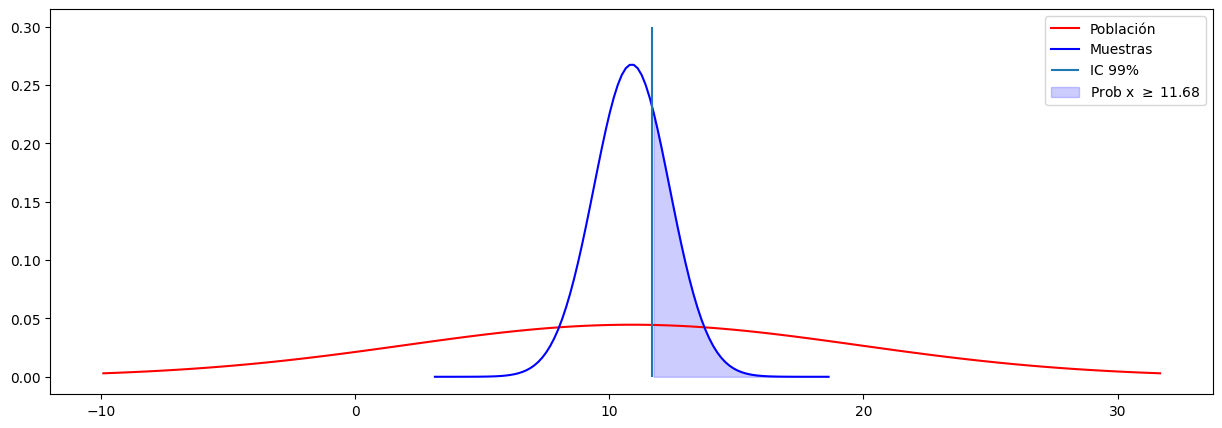

Probabilidad de que la media sea sobre 11.68 Km/L es: 0.2957


In [ ]:
poblacion = stats.norm(xbar, S)
x = np.linspace(poblacion.ppf(0.01), poblacion.ppf(0.99), 100)
pdf = poblacion.pdf(x) # función densidad probabilidad

# proyectar distribución medias n=172
medias = stats.norm(xbar, S_xbar)
x_m = np.linspace(medias.ppf(0.0000001), medias.ppf(0.9999999), 100)
pdf_m = medias.pdf(x_m) # función densidad probabilidad

limite = 11.68

plt.figure(figsize=(15, 5)) # tamaño gráfico
plt.plot(x, pdf,"r") # poblacion fit
plt.plot(x_m, pdf_m,"b", ) # medias fit
plt.vlines(ymin=0, ymax=0.3, x=limite)# LS IC
plt.fill_between(x_m, pdf_m,
                 where=(x_m >= limite),
                 color='b', alpha=0.2, label='Prob >= 11.68')
plt.legend(['Población','Muestras', 'IC 99%', 'Prob x $\geq$ 11.68'])
plt.show()
prob1= stats.norm(10.88, S_xbar).sf(limite) # se calcula el complemento con .sf
print(f'Probabilidad de que la media sea sobre 11.68 Km/L es: {prob1:6.4f}')

A la empresa le diría que con un 99% de confianza sabemos que el rendimiento promedio de los autos será entre 7.04 y 14.72 Km/L por litro. Y que la probabilidad de tener la media mínima de 11.69 Km/L es menor al 30%. Por lo que NO es aconsejable realizar la compra.

<font color='green'>Fin actividad 6</font>

### <font color='green'>Actividad 7</font>
Un artículo publicado en el Journal of Heat Transfer (Trans ASME, Ses. C, 96 1974, pag. 59) describe un nuevo método para medir la conductividad térmica del hierro Armco. Al utilizar una temperatura de 100ºF y una potencia de entrada de 550 W, se obtienen las diez mediciones siguientes de conductividad térmica (en BTU/hr-ft-ºF):
```Python
conductividad = (41.6, 41.48, 42.34, 41.95, 41.86, 42.18, 41.72, 42.26, 41.81, 42.04)
```

1. Se desea construir un IC del 95% para conductividad térmica promedio de ese material, se sabe que la desviación estándar es de 0,30 Btu/hr-ft-ºF

In [ ]:
# n < 30, pero se conoce la desv. std poblacional, por tanto aplicar Z (Distribucion normal estandadarizada) N(0,1)

# Caso NC = 0.95
# primero registrar los datos
conductividad = (41.6, 41.48, 42.34, 41.95, 41.86, 42.18, 41.72, 42.26, 41.81, 42.04) # Datos 10 mediciones
n= 10
xbar = sum(conductividad) / len(conductividad)
S = 0.3 # DS Poblacional
S_xbar = S / np.sqrt(n) # DS Muestral

# IC con NC 95%
NC = 0.95
alpha = 1 - NC
alpha_medio = alpha / 2

# Calcular Z con la función de distribución normal acumulada inversa (ppf)
Z = stats.norm.ppf(1 - alpha_medio)
print(f"Z: {Z: 6.4f}")

LI = xbar - Z * (S / np.sqrt(n))
LS = xbar + Z * (S / np.sqrt(n))

print(f'Intervalo de Confianza (IC) al {NC} para media poblacional: {LI:4.2f}, {LS:4.2f}')

Z:  1.9600
Intervalo de Confianza (IC) al 0.95 para media poblacional: 41.74, 42.11


In [ ]:
# Forma simple con Scipy
IC95 = stats.norm.interval(NC, loc = xbar, scale = S /np.sqrt(n))
print(f'IC al {NC} para media muestral:  {IC95[0]:4.2f}, {IC95[1]:4.2f}')

IC al 0.95 para media muestral:  41.74, 42.11


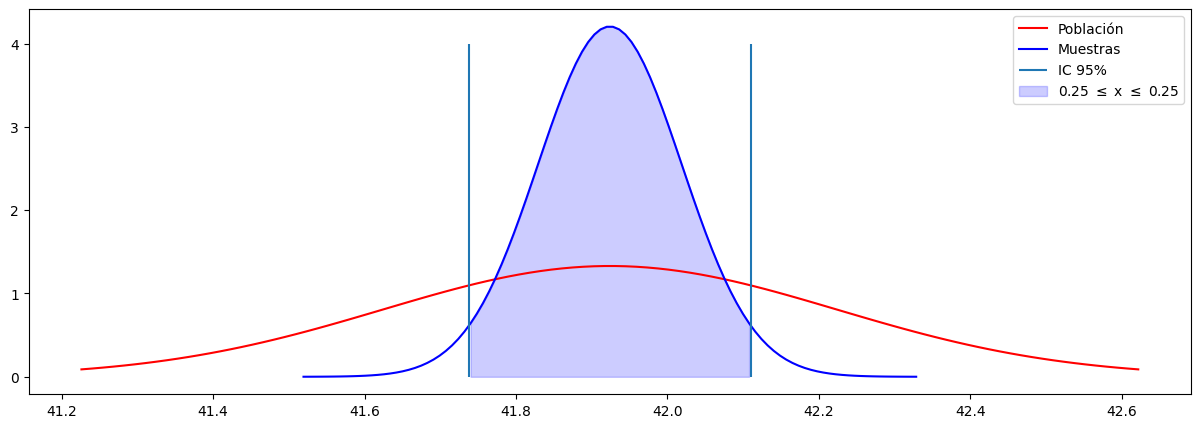

La probabilidad es: 0.9750
IC al 0.95 para media muestral:  41.74, 42.11


In [ ]:
#Graficando la distribucion normal de poblacion y medias

# proyectar distribución población
poblacion = stats.norm(xbar, S)
x = np.linspace(poblacion.ppf(0.01), poblacion.ppf(0.99), 100)
pdf = poblacion.pdf(x) # función densidad probabilidad

# proyectar distribución medias n=172
medias = stats.norm(xbar, S_xbar)
x_m = np.linspace(medias.ppf(0.00001), medias.ppf(0.99999), 100)
pdf_m = medias.pdf(x_m) # función densidad probabilidad

LI = xbar - Z * (S_xbar)
LS = xbar + Z * (S_xbar)

plt.figure(figsize=(15, 5)) # tamaño gráfico
plt.plot(x, pdf,"r") # poblacion fit
plt.plot(x_m, pdf_m,"b") # medias fit
plt.vlines(ymin=0, ymax=4, x=(LI, LS))# LI & LS IC
plt.fill_between(x_m, pdf_m,
                 where=(x_m >= LI) & (x_m <= LS),
                 color='b', alpha=0.2, label='Prob >= 0.95')
plt.legend(['Población','Muestras', 'IC 95%', '0.25 $\leq$ x $\leq$ 0.25'])
plt.show()

# Solo para comprobar:
# calcular probabilidad de tomar una muestra y que ésta tenga una media menor al LS del IC
prob_acum_LS = stats.norm(xbar, S_xbar).cdf(LS)
print(f'La probabilidad es: {prob_acum_LS:6.4f}')
IC95 = stats.norm.interval(NC, loc = xbar, scale = S_xbar)
print(f'IC al {NC} para media muestral:  {IC95[0]:4.2f}, {IC95[1]:4.2f}')

<font color='green'>Fin actividad 7</font>

### <font color='green'>Actividad 8</font>

Se desea estimar la velocidad media en una calle con un límite teórico de 80 km/hora.

Con un radar oculto, se observó que la velocidad media de una muestra de 25 autos fue de 88 km/hora. Si la desviación estándar de la velocidad en esta calle es de 6 km/hora:
1. Calcule un intervalo de 95 % de confianza para la verdadera velocidad media.
2. Visualice la distribución y los límites.

In [ ]:
# n < 30, pero se conoce la desv. std poblacional, por tanto aplicar Z (Distribucion normal estandadarizada) N(0,1)

# Caso NC = 0.95
# primero registrar los datos
n= 25
xbar = 88
S = 6
S_xbar = S / np.sqrt(n)

# IC con NC 95%
NC = 0.95
alpha = 1 - NC
alpha_medio = alpha / 2

# Calcular Z con la función de distribución normal acumulada inversa (ppf)
Z = stats.norm.ppf(1 - alpha_medio)
print(f"Z: {Z: 6.4f}")

LI = xbar - Z * (S / np.sqrt(n))
LS = xbar + Z * (S / np.sqrt(n))

print(f'Intervalo de Confianza (IC) al {NC} para media poblacional: {LI:4.2f}, {LS:4.2f}')

Z:  1.9600
Intervalo de Confianza (IC) al 0.95 para media poblacional: 85.65, 90.35


In [ ]:
# Forma simple con Scipy
IC95 = stats.norm.interval(NC, loc = xbar, scale = S /np.sqrt(n))
print(f'IC al {NC} para media poblacional:  {IC95[0]:4.2f}, {IC95[1]:4.2f}')

IC al 0.95 para media poblacional:  85.65, 90.35


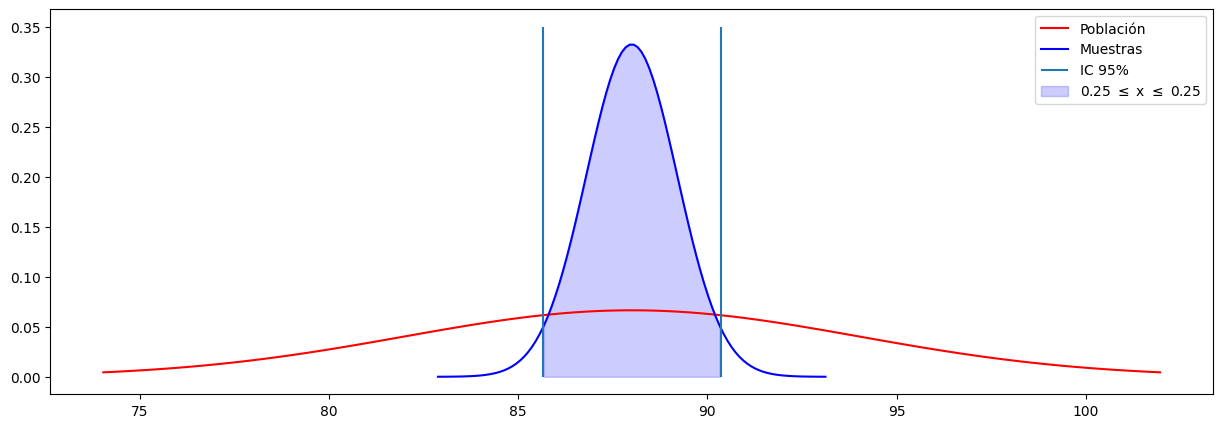

La probabilidad es: 0.9750
IC al 0.95 para media muestral:  85.65, 90.35


In [ ]:
#Graficando la distribucion normal de poblacion y medias

# proyectar distribución población
poblacion = stats.norm(xbar, S)
x = np.linspace(poblacion.ppf(0.01), poblacion.ppf(0.99), 100)
pdf = poblacion.pdf(x) # función densidad probabilidad

# proyectar distribución medias n=172
medias = stats.norm(xbar, S_xbar)
x_m = np.linspace(medias.ppf(0.00001), medias.ppf(0.99999), 100)
pdf_m = medias.pdf(x_m) # función densidad probabilidad

LI = xbar - Z * (S_xbar)
LS = xbar + Z * (S_xbar)

plt.figure(figsize=(15, 5)) # tamaño gráfico
plt.plot(x, pdf,"r") # poblacion fit
plt.plot(x_m, pdf_m,"b") # medias fit
plt.vlines(ymin=0, ymax=0.35, x=(LI, LS))# LI & LS IC
plt.fill_between(x_m, pdf_m,
                 where=(x_m >= LI) & (x_m <= LS),
                 color='b', alpha=0.2, label='Prob >= 0.99')
plt.legend(['Población','Muestras', 'IC 95%', '0.25 $\leq$ x $\leq$ 0.25'])
plt.show()

# Solo para comprobar:
# calcular probabilidad de tomar una muestra y que ésta tenga una media menor al LS del IC
prob_acum_LS = stats.norm(xbar, S_xbar).cdf(LS)
print(f'La probabilidad es: {prob_acum_LS:6.4f}')
IC95 = stats.norm.interval(NC, loc = xbar, scale = S_xbar)
print(f'IC al {NC} para media muestral:  {IC95[0]:4.2f}, {IC95[1]:4.2f}')

<font color='green'>Fin actividad 8</font>

### <font color='blue'>**Muestras pequeñas**</font>

Cuando __no se conoce__ el valor de  $\sigma$ y $n \lt 30$, entonces el I.C. para la media muestral aplicará la __Distribución T de Student__:

$$
\left(\bar{x} - t_{(n-1),{1-\alpha/2}} \frac{\hat{S}}{\sqrt{n}}; \quad \bar{x} + t_{(n-1),{1-\alpha/2}} \frac{\hat{S}}{\sqrt{n}}  \right)
$$


Siendo $t_{n-1,\alpha/2}$ el valor de una Distribución t-Student con $(n-1)$ grados de libertad, que deja a la derecha $\alpha/2$ de área (mismo significado que en el caso anterior, pero debemos buscar dicho valor en la densidad $t$ con $(n-1)$ grados de libertad).

$$
T = \frac{\bar{x} - \mu}{\frac{S}{\sqrt{n}}} \sim t_{n-1}
$$

Los grados de libertad de la Distribución T-Student se corresponden con el tamaño de la muestra con la que se calculó $\hat{S}$.

<img src='https://drive.google.com/uc?export=view&id=1bJvbRXaa-aHrasgZ7OcxxgOFlMx0tQJG' width="400" align="left" style="margin-right: 20px">
<br>

__Notas:__

1. Si la muestra es pequeña, pero se conoce la desviación estándar de la población, el cálculo de IC debe aplicar la Distribución Normal estándar ($Z$).
2. En la práctica, si de una población no se conoce la media (y por eso intentamos estimarla), es raro conocer la desviación típica. En estos casos, utilizaremos el segundo método presentado.

### <font color='green'>Actividad 9</font>
Un artículo públicado en el Journal of testing and Evaluation presenta las siguientes 20 mediciones del tiempo de combustión residual (en segundos) de especímenes tratados de ropa de dormir para niños:

```python
tiempo = (9.85, 9.93, 9.75, 9.77, 9.67, 9.87, 9.67, 9.94, 9.85, 9.75, 9.83, 9.92, 9.74, 9.99, 9.88, 9.95, 9.95, 9.93, 9.92, 9.89)
```
1. Se desea encontrar un IC del 95% para el tiempo de combustión residual promedio.

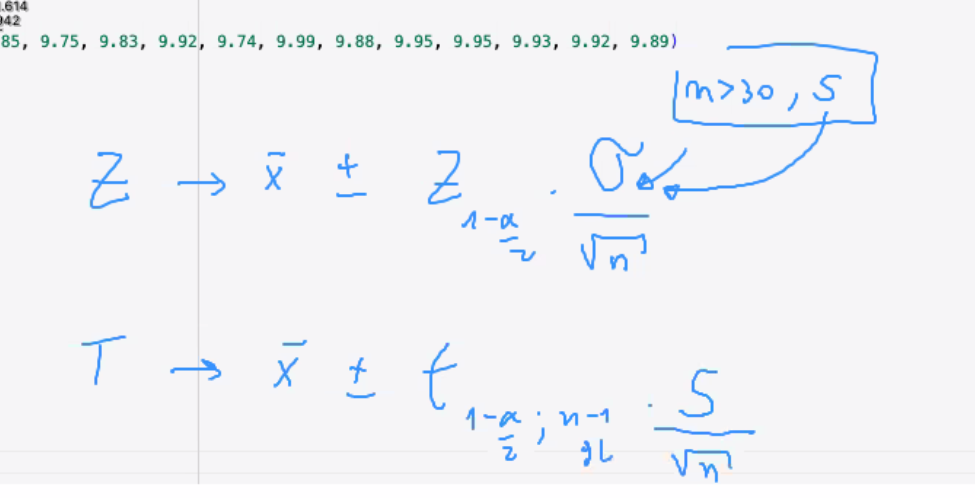

In [ ]:
# n < 30, y se desconoce la desv. std poblacional, por tanto asumir y aplicar T (distribucion de Student) para calculo de DS poblacional

# Datos 20 mediciones
tiempo = (9.85, 9.93, 9.75, 9.77, 9.67, 9.87, 9.67, 9.94, 9.85, 9.75, 9.83, 9.92, 9.74, 9.99, 9.88, 9.95, 9.95, 9.93, 9.92, 9.89)

# Caso NC = 0.95
# primero registrar los datos
n= np.size(tiempo)
xbar = np.mean(tiempo)
S_xbar = np.std(tiempo, ddof=1) #Calculamos la ds estandar muestral y usamos ddof=1 para n-1 grados de libertad


# IC con NC 95%
NC = 0.95
alpha = 1 - NC
alpha_medio = alpha / 2
df = n - 1 #Grados de libertad

# Calcular Z con la función de distribución normal acumulada inversa (ppf)
T = stats.t.ppf(1 - alpha_medio, df) #Valor crítico de t-student
print(f"T: {Z: 6.4f}")

#SEM = S / np.sqrt(n) =  S_xbar Cálculo del error estándar de la media (SEM)
#ME = T * SEM  Cálculo del margen de error (ME)


LI = xbar - T * (S_xbar / np.sqrt(n))
LS = xbar + T * (S_xbar / np.sqrt(n))

print(f'Intervalo de Confianza (IC) al {NC} para media poblacional: {LI:4.2f}, {LS:4.2f}')

T:  2.5758
Intervalo de Confianza (IC) al 0.95 para media poblacional: 9.81, 9.90


In [ ]:
# Forma simple con Scipy
IC95 = stats.t.interval(NC, loc = xbar, scale = S_xbar / np.sqrt(n), df=df)
print(f'IC al {NC} para media poblacional:  {IC95[0]:4.2f}, {IC95[1]:4.2f}')

IC al 0.95 para media poblacional:  9.81, 9.90


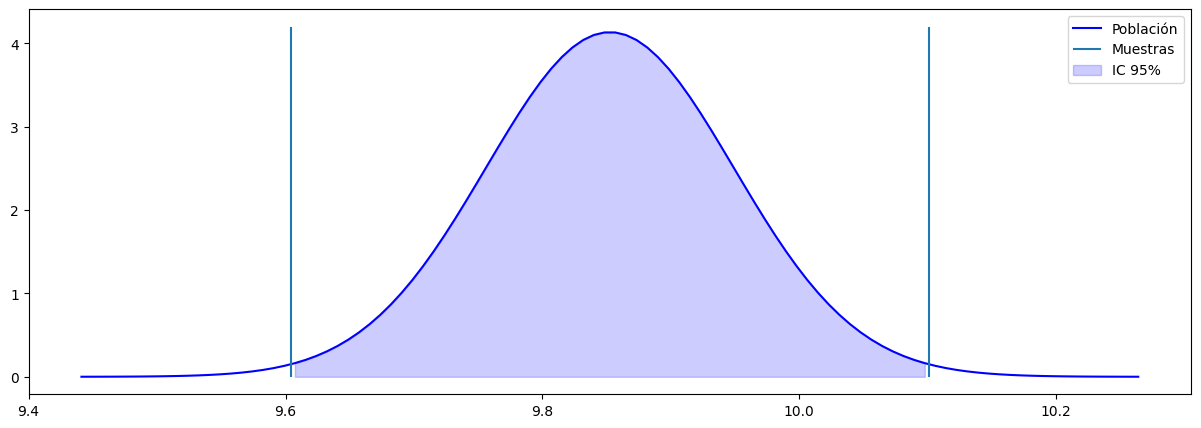

La probabilidad es: 1.0000
IC al 0.95 para media muestral:  9.81, 9.90


In [ ]:
#Graficando la distribucion normal de poblacion y medias

# proyectar distribución medias n=172
medias = stats.norm(xbar, S_xbar)
x_m = np.linspace(medias.ppf(0.00001), medias.ppf(0.99999), 100)
pdf_m = medias.pdf(x_m) # función densidad probabilidad

LI = xbar - Z * (S_xbar)
LS = xbar + Z * (S_xbar)

plt.figure(figsize=(15, 5)) # tamaño gráfico
plt.plot(x_m, pdf_m,"b") # medias fit
plt.vlines(ymin=0, ymax=4.2, x=(LI, LS))# LI & LS IC
plt.fill_between(x_m, pdf_m,
                 where=(x_m >= LI) & (x_m <= LS),
                 color='b', alpha=0.2, label='Prob >= 0.99')
plt.legend(['Población','Muestras', 'IC 95%', '0.25 $\leq$ x $\leq$ 0.25'])
plt.show()

# Solo para comprobar:
# calcular probabilidad de tomar una muestra y que ésta tenga una media menor al LS del IC
prob_acum_LS = stats.t(xbar, S_xbar).cdf(LS)
print(f'La probabilidad es: {prob_acum_LS:6.4f}')
IC95 = stats.t.interval(NC, loc = xbar, scale = S_xbar / np.sqrt(n), df=df)
print(f'IC al {NC} para media muestral:  {IC95[0]:4.2f}, {IC95[1]:4.2f}')

<font color='green'>Fin actividad 9</font>

## <font color='blue'>**Intervalo de Confianza para Proporción Poblacional**</font>

Un estimador de intervalo de confianza  de la proporción en la población ($p$), es un intervalo, calculado a partir de los datos de la muestra, en el cual nosotros “confiamos” se encuentra la proporción de la población.

Una proporción muestral $\hat{p}$ es un estimador puntual de la proporción $p$ de la población. Entonces:
$$
\hat{p} \sim N\left(p,  \; \sqrt{\frac{p(1-p)}{n}} \right)
$$

__Pasos:__

1. Fijar el nivel de confianza, $(1-\alpha);\quad 0 \lt \alpha \lt 1$.
2. Si $n$ es grande $(n \gt 30)$, $\hat{p}$ es un estimador de la proporción $p$ de la población:

$$
\hat{p} = \frac{x_1 + x_2 + \dots + x_i}{n}
$$

Donde cada $x_i$ toma el valor 1, si presenta la característica de la población y 0 si no la tiene.

3.   Selección del Estadístico Pivote ($Z$) para la estimar la proporción muestral:

$$Z = \frac{\hat{p} - p}{\sqrt{\frac{p\:(1-p)}{n}}} \sim N(0,1)$$

4.   Plantear el Intervalo de confianza para 𝒑 con nivel de confianza $(1-\alpha)$

$$
IC_{1-\alpha}(p): \underbrace{ \bigg(\hat{p}-Z_{1-\alpha/2}\underbrace{{\sqrt{\frac{p\:(1-p)}{n}}}}_{EM}}_{LI};\quad \underbrace{\hat{p}+Z_{1-\alpha/2}\underbrace{{\sqrt{\frac{p\:(1-p)}{n}}}}_{EM} \bigg)}_{LS}
$$
donde:<br>
$LI$: Límite inferior<br>
$LS$: Límite superior<br>
$EM$: Error muestral<br>

**Consideraciones:**
En la práctica, no se puede calcular el intervalo porque la desviación estándar depende del valor desconocido $p$. Para resolver dicho problema se presenta la siguiente alternativa:

Sustituir $p$ por su estimador $\hat{p}$. El intervalo resultante es:

$$
IC_{1-\alpha}(p):  \bigg(\hat{p}-Z_{1-\alpha/2}\sqrt{\frac{\hat{p}\:(1-\hat{p})}{n}};\quad \hat{p}+Z_{1-\alpha/2}\sqrt{\frac{\hat{p}\:(1-\hat{p})}{n}} \bigg)
$$

<img src='https://drive.google.com/uc?export=view&id=1W3LNdPHdYctV23g4kZ12utXBhknYfL9W' width="500" align="center" style="margin-right: 20px">
<br>


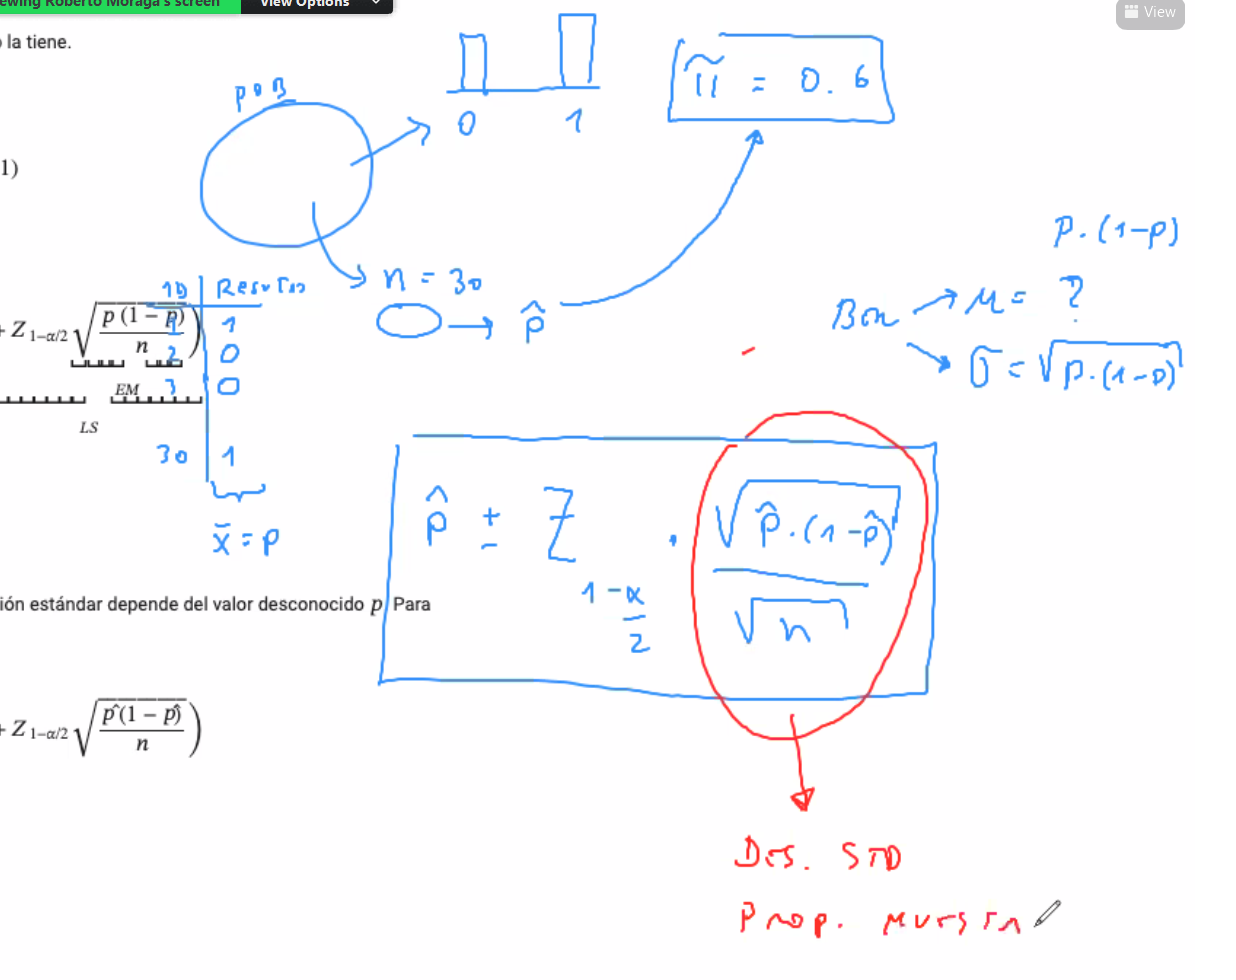

### <font color='blue'>**Ejemplo de IC en proporciones**</font>

Se selecciona aleatoriamente una muestra de 600 personas en una ciudad y se les pregunta si consideran que el tráfico en la misma es aceptablemente fluido. Responden afirmativamente 250 personas. ¿Cuál es el intervalo de confianza de la proporción de ciudadanos de esa ciudad que consideran aceptable la fluidez del tráfico, con un nivel de confianza del 90 % ?

In [ ]:
# n >= 30,  n*p y n*(1-p) >= 5, aplicar Dist. Normal Std (Z) (con esos parametros la bernoulli se aproxima a una normal)
# Datos
n = 600
p = 250 / n # prop. muestral 'si es fluido'
S = np.sqrt(p * (1 - p)) # desv std de la muestra

NC = 0.90
alpha = 1 - NC
alpha_medio = alpha / 2

# Calcular Z con la función de distribución normal acumulada inversa (ppf)
Z = stats.norm.ppf(1 - alpha_medio)# 2 colas IC
print(f'Z: {Z:4.2f}')

LI = p - Z *(S / np.sqrt(n))
LS = p + Z *(S / np.sqrt(n))

print(f'Intervalo de Confianza (IC) al {NC} para proporción poblacional: {LI:4.2f}, {LS:4.2f}')

Z: 1.64
Intervalo de Confianza (IC) al 0.9 para proporción poblacional: 0.38, 0.45


In [ ]:
# Forma simple con Scipy
IC90 = stats.norm.interval(NC, loc = p, scale = S /np.sqrt(n))
print(f'IC al {NC} para proporción poblacional:  {IC90[0]:4.2f}, {IC90[1]:4.2f}')

IC al 0.9 para proporción poblacional:  0.38, 0.45


### <font color='green'>Actividad 10</font>
Una de las últimas encuestas sobre los candidatos a las elecciones de diciembre del 2005, dice que la candidata Marta Mujica obtiene un 49% de las preferencias.

La ficha técnica de la muestra, nos indica lo siguiente:  
* n = 830
* p = 0.49
* Nivel de confianza = 0.95
* error muestral = 0.034

Construya un intervalo de 95% de confianza para la estimación de la encuesta. Interprete. ¿Corresponde el error muestral de la ficha técnica al calculado por usted?

In [ ]:
# n >= 30,  n*p y n*(1-p) >= 5, aplicar Dist. Normal Std (Z)
# Datos
n = 830
p = 0.49 # prop. muestral 'si es fluido'
S = np.sqrt(p * (1 - p)) # desv std de la muestra
S_xbarra = S/np.sqrt(n)

NC = 0.95
alpha = 1 - NC
alpha_medio = alpha / 2

# Calcular Z con la función de distribución normal acumulada inversa (ppf)
Z = stats.norm.ppf(1 - alpha_medio)#2 colas IC
print(f'Z: {Z:4.2f}')

LI = p - Z *(S / np.sqrt(n))
LS = p + Z *(S / np.sqrt(n))

print(f'Intervalo de Confianza (IC) al {NC} para media muestral: {LI:4.2f}, {LS:4.2f}')

Z: 1.96
Intervalo de Confianza (IC) al 0.95 para media muestral: 0.46, 0.52


In [ ]:
#Forma simple con Scipy
IC95 = stats.norm.interval(NC, loc = p, scale = S /np.sqrt(n))
print(f'IC al {NC} para media poblacional:  {IC95[0]:4.2f}, {IC95[1]:4.2f}')

IC al 0.95 para media poblacional:  0.46, 0.52


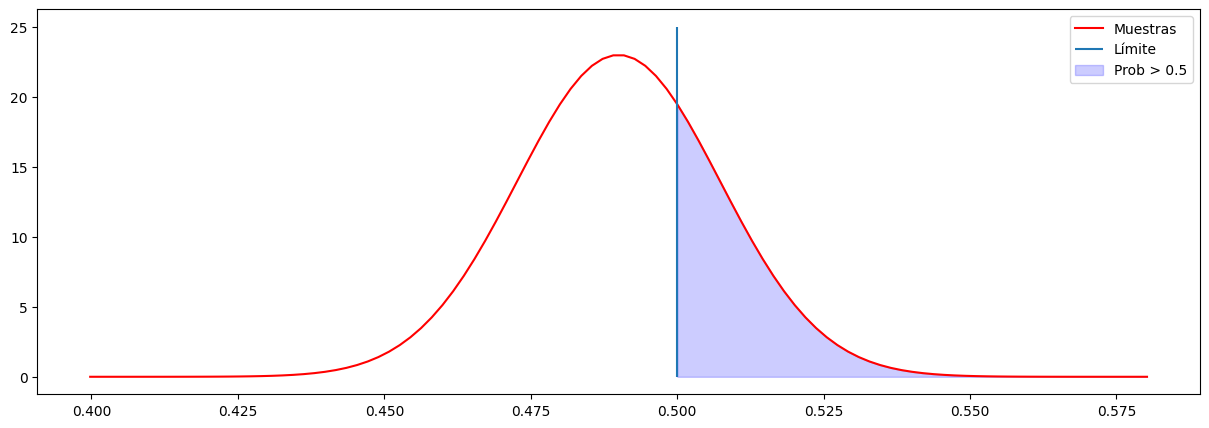

Probabilidad es: 0.2822


In [ ]:
#2
# Visualizar

# proyectar distribución medias n=830
medias = stats.norm(p, S_xbarra)
x_m = np.linspace(medias.ppf(0.0000001), medias.ppf(0.9999999), 100)
pdf_m = medias.pdf(x_m) # funcion densidad probabilidad

limite = 0.5

plt.figure(figsize=(15, 5)) # tamaño gráfico
plt.plot(x_m, pdf_m,"r") # medias fit
plt.vlines(ymin=0, ymax=25, x=limite)# Límite
plt.fill_between(x_m, pdf_m,
                 where = (x_m > limite),
                 color='b', alpha=0.2, label='Prob > 0.5')
plt.legend(['Muestras', 'Límite', 'Prob > 0.5']) #"$\leq$": Less than or equal to / "$\geq$": Greater than or equal to / "$<$": Less than / "$>$": Greater than
plt.show()
prob1= stats.norm(p, S_xbarra).sf(limite) # se calcula el complemento con .sf
print(f'Probabilidad es: {prob1:6.4f}')

Dado el intervalo de confianza al 95%, no es posible tener certeza de que ganará las elecciones debido a que ocila entre un 46% y 52% de los votos. Por otro lado solo existe un 28,22%. de probabilidad de que sea sobre el 50% de los votos.

In [ ]:
SEM = S / np.sqrt(n) # =  S_xbar Cálculo del error estándar de la media (SEM)
ME = T * SEM  # Cálculo del margen de error (ME)
Error_muestral = (LS - LI)/2
print(f'El error muestral es: {Error_muestral:6.3f}')
print(S_xbarra)
print(SEM)
print(ME)

El error muestral es:  0.034
0.017351781964668574
0.017351781964668574
0.0363176970388988


Podemos ver que el error muestral es igual al de la ficha técnica


<font color='green'>Fin actividad 10</font>

## <font color='blue'>**Control del ancho de un intervalo**</font>
Para disminuir el error muestral o mejorar la precisión se debe considerar:
* A mayor tamaño de la muestra, menor es el Margen de Error.
* Cuanto menor es la desviación estandar $\sigma$, menor es el Margen de Error.

Qué elementos no contribuyen a mejorar la estimación:
* Cuanto mayor es el nivel de confianza $(1-\alpha)$, mayor es el Margen de Error.
* A menor tamaño de la muestra, mayor es el Margen de Error.
* A mayor heterogeneidad de la población, mayor es el Margen de Error.

## <font color='blue'>**Determinación del tamaño apropiado de la muestra**</fonrt>

### Para estimar medias

¿Qué se necesita para determinar el __tamaño de una muestra__ para un promedio?

* Establecer el __Margen Error__ deseado.
* Establecer el __Nivel de Confianza__  o __Riesgo__.
* Magnitud de la dispersión o grado de heterogeneidad de la variable.

$$
z_{1-\alpha/2} \frac{\sigma}{\sqrt{n}} \le EM \Longleftrightarrow n \ge \left(z_{1-\alpha/2}\frac{\sigma}{EM}\right)^2
$$

### <font color='blue'>**Ejemplo para medias**</font>

Una tienda local vende bolsas de plástico para basura y ha recibido unas cuantas quejas con respecto a la resistencia de tales bolsas. Parece ser que las bolsas que se venden en la tienda son menos resistentes que las que vende su competidor y, en consecuencia, se rompen más a menudo. El gerente encargado de adquisición, está interesado en determinar el peso máximo promedio que puede resistir una de las bolsas para basura sin que se rompa. Si la desviación estándar del peso límite que puede aguantar una bolsa es de 1.2 Kg, determine el número de bolsas que deben ser probadas con el fin de que el Gerente tenga una certeza de 95% de que el peso límite promedio está dentro de 0.5 Kg, del promedio real.


A esto se le llama pruebas destructivas

In [ ]:
# Datos
Sigma = 1.2 # desv std poblacional conocida
# (LS - LI) = ancho del intervalo = 2 * error muestral
error_muestral = 0.5
NC = 0.95
alpha = 1 - NC
alpha_medio = alpha / 2
Z = stats.norm.ppf(1 - alpha_medio) #2 colas
print(f'Z: {Z:6.4f}')

# n = ?
n = ((Z * Sigma) / error_muestral)**2
print('El tamaño de la muestra debe ser > ', round(n))

Z: 1.9600
El tamaño de la muestra debe ser >  22


### <font color='blue'>**Para estimar proporciones**</font>

Al igual que en el caso de la media, para obtener el tamaño muestral que cumpla el requirimiento del investigador, se obtiene despejando $n$ de la expresión:

$$
EM = Z_{1-\alpha/2}\sqrt{\frac{\hat{p}\:(1-\hat{p})}{n}} \Longrightarrow	n = \frac{Z_{1-\alpha/2}^2 \hat{p}\:(1-\hat{p})}{EM^2}
$$

### <font color='blue'>**Ejemplo para proporciones**</font>

Para estimar la proporción de familias de una determinada ciudad que poseen microondas, se quiere utilizar una muestra aleatoria de medida $n$.

Calcula el valor mínimo de $n$ para garantizar que, a un nivel de confianza del 95%, el error en la estimación sea menor que 0.05. Como se desconoce la proporción, se ha de tomar el caso más desfavorable, que será 0.5 (Utilizando Varianza Máxima).



In [ ]:
# Datos
P = 0.5 # se desconoce Prop poblacional, se utiliza varianza maxima
Sigma = np.sqrt(P * (1 - P)) # desv std poblacional
# (LS - LI) = ancho del intervalo = 2*error muestral
error_muestral = 0.05
NC = 0.95
alpha = 1 - NC
alpha_medio = alpha / 2
Z = stats.norm.ppf(1 - alpha_medio) #2 colas
print(f'Z: {Z:6.4f}')

# n= ?
n = ((Z * Sigma) / error_muestral)**2
print('El tamaño de la muestra debe ser > ', round(n))

Z: 1.9600
El tamaño de la muestra debe ser >  384


### <font color='green'>Actividad 11</font>
Para estimar la proporción de las viviendas de una determinada ciudad que tienen aire acondicionado se quiere utilizar una muestra de tamaño $n$. Calcule el valor mínimo de $n$ para que, con un nivel de confianza del 97%, el error en la estimación sea más pequeño que 0.05.

Como se desconoce la proporción, se debe tomar el caso más desfavorable, que será 0,5.

In [ ]:
# Datos
P = 0.5 # se desconoce Prop poblacional, se utiliza varianza maxima
Sigma = np.sqrt(P * (1 - P)) # desv std poblacional
# (LS - LI) = ancho del intervalo = 2*error muestral
error_muestral = 0.05
NC = 0.97
alpha = 1 - NC
alpha_medio = alpha / 2
Z = stats.norm.ppf(1 - alpha_medio) #2 colas
print(f'Z: {Z:6.4f}')

# n= ?
n = ((Z * Sigma) / error_muestral)**2
print('El tamaño de la muestra debe ser > ', round(n))


Z: 2.1701
El tamaño de la muestra debe ser >  471


<font color='green'>Fin actividad 11</font>

<img src="https://drive.google.com/uc?export=view&id=1bqkJJ7QiIOTsp-7jm5eUtK-XYWMEq2_K" width="100" align="left" />
<br clear="left">

## <font color='blue'>**Resumen**</font>



Un intervalo de confianza (IC) es un rango de valores dentro del cual se espera que se encuentre un parámetro de población con un cierto nivel de confianza. Un intervalo de confianza se calcula a partir de una muestra de datos y se utiliza para hacer inferencias sobre la población a partir de la cual se extrajo la muestra.

El valor de confianza es la probabilidad de que el intervalo de confianza contenga el parámetro de población. Por ejemplo, un intervalo de confianza del 95% significa que hay un 95% de probabilidad de que el intervalo contenga el parámetro de población.

Hay dos tipos principales de intervalos de confianza:

* Intervalos de confianza para medias: se utilizan para estimar la media de una población a partir de una muestra de datos.
* Intervalos de confianza para proporciones: se utilizan para estimar la proporción de una población binomial a partir de una muestra de datos.

Los intervalos de confianza son una herramienta valiosa para hacer inferencias sobre la población a partir de la cual se extrajo la muestra. Se utilizan en una variedad de campos, incluyendo la investigación, la calidad y la industria.